<h1 style="color:blue; font-size:36px;">Projet Machine Learning 4A</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')



### <span style="color:blue">**Introduction** </span>

**Le jeu de données "Energy" couvre la période de 2000 à 2020 et fournit des informations détaillées sur la consommation énergétique et la géographie de 176 pays. Avec 3649 observations et 21 variables, telles que l'accès à l'électricité, la part des énergies renouvelables et les émissions de CO2, notre objectif est de prédire la variable "Value-co2-emissions" en utilisant les autres variables disponibles. Dans cette étude, nous chercherons à évaluer les performances des modèles d'apprentissage automatique tels que la régression linéaire, les machines à vecteurs de support (SVM), l'arbre de décision (CART) et Random Forest pour atteindre cet objectif**

### <span style="color:blue">**I. Prétraitement des données** </span>

#### <span style="color:blue">**I.1 Suppression des NAN** </span>

In [2]:
energy=pd.read_csv('global-data-on-sustainable-energy.csv')

**En utilisant la statistique "count", nous remarquons des variations dans le nombre d'observations pour chaque variable, ce qui suggère la présence de données manquantes.**

In [3]:
(energy.isna().sum()/energy.shape[0]*100).sort_values(ascending=False)

Renewables (% equivalent primary energy)                            58.563990
Financial flows to developing countries (US $)                      57.248561
Renewable-electricity-generating-capacity-per-capita                25.513839
Value_co2_emissions_kt_by_country                                   11.729241
gdp_growth                                                           8.687312
gdp_per_capita                                                       7.728145
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          5.672787
Renewable energy share in the total final energy consumption (%)     5.316525
Access to clean fuels for cooking                                    4.631406
Electricity from nuclear (TWh)                                       3.453001
Low-carbon electricity (% electricity)                               1.151000
Electricity from renewables (TWh)                                    0.575500
Electricity from fossil fuels (TWh)                             

**Nous allons procéder à l'élimination des variables "Renewables", "Financial flows to developing countries" et "Renewable-electricity-generating-capacity-per-capita" en raison de leur taux élevé de données manquantes, situé entre 25 % et 60 %. Ensuite, nous filtrerons tous les individus présentant des valeurs non disponibles (NaN) pour les variables restantes. Cette étape nous permettra de conserver 2868 individus avec 18 variables.**

In [4]:
energy.drop(['Renewable-electricity-generating-capacity-per-capita','Financial flows to developing countries (US $)','Renewables (% equivalent primary energy)'],axis=1,inplace=True)

In [5]:
energy.dropna(axis=0,inplace=True)
energy.shape

(2868, 18)

In [6]:
energy.iloc[:,14]=energy.iloc[:,14].str.replace(',','') #on remplace les virgule de la colonne Density par un espace
energy.iloc[:, 14] = pd.to_numeric(energy.iloc[:, 14], errors='coerce')

#### <span style="color:blue">**I.2 Conversion des variables 'Year' et 'Entity'** </span>

In [7]:
energy['Year'] = energy['Year'].astype('category')
energy.rename(columns={energy.columns[14]: 'Density'}, inplace=True)#renommer la colonne Density pour faciliter l'accés à la variable
energy['Density']= pd.to_numeric(energy['Density'], errors='coerce')


In [8]:
# Regrouper les émissions de CO2 par pays
co2_by_country = energy.groupby('Entity')['Value_co2_emissions_kt_by_country'].sum().reset_index()

# Trier les pays par ordre décroissant en fonction des émissions de CO2
co2_by_country_sorted = co2_by_country.sort_values(by='Value_co2_emissions_kt_by_country', ascending=False)

# Afficher les résultats
print(co2_by_country_sorted)

                    Entity  Value_co2_emissions_kt_by_country
27                   China                       1.527328e+08
142          United States                       1.065908e+08
62                   India                       3.267958e+07
68                   Japan                       2.367469e+07
50                 Germany                       1.547289e+07
..                     ...                                ...
35                Djibouti                       2.520000e+03
145                Vanuatu                       2.460000e+03
114  Sao Tome and Principe                       1.860000e+03
71                Kiribati                       1.190000e+03
92                   Nauru                       5.300000e+02

[148 rows x 2 columns]


##### Les 5 pays les plus émetteurs de CO2 sont: La chine, les etats unis,l'inde, le japon et L'Allemagne

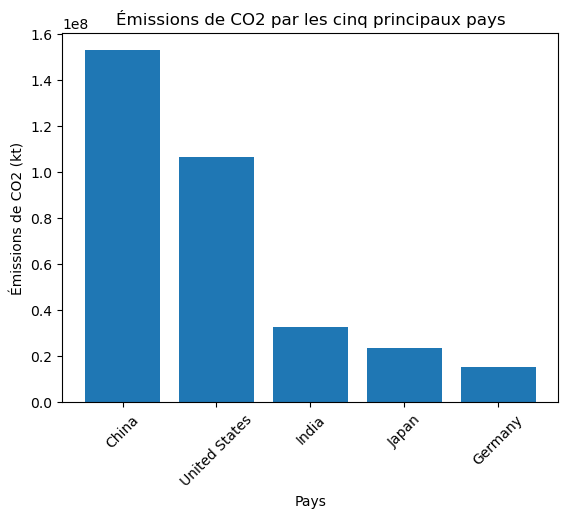

In [9]:
# Sélectionner les cinq principaux pays
top_5_countries = co2_by_country_sorted.head(5)

# Tracer l'histogramme
plt.bar(top_5_countries['Entity'], top_5_countries['Value_co2_emissions_kt_by_country'])
plt.xlabel('Pays')
plt.ylabel('Émissions de CO2 (kt)')
plt.title('Émissions de CO2 par les cinq principaux pays')
plt.xticks(rotation=45)
plt.show()

**On supprime également la variable Electricity from fossil fuels (TWh). Cette variable étant très corrélée avec la variable à prédire ,  on l'enlève d'après la consigne.**

In [10]:
energy.drop(['Electricity from fossil fuels (TWh)'],axis=1,inplace=True)

### <span style="color:blue">**II. Analyse unidimentionnelle** </span>

#### <span style="color:blue">*II.1 Variables qualitatives* </span>

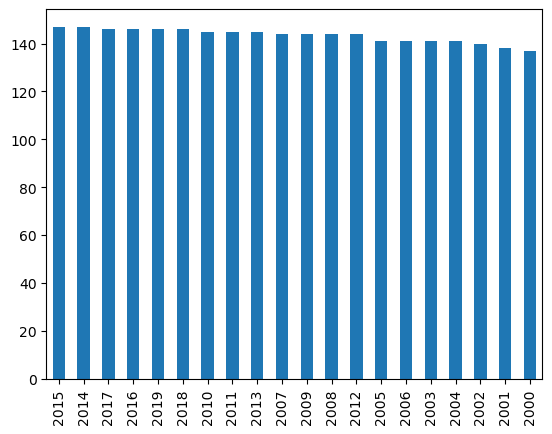

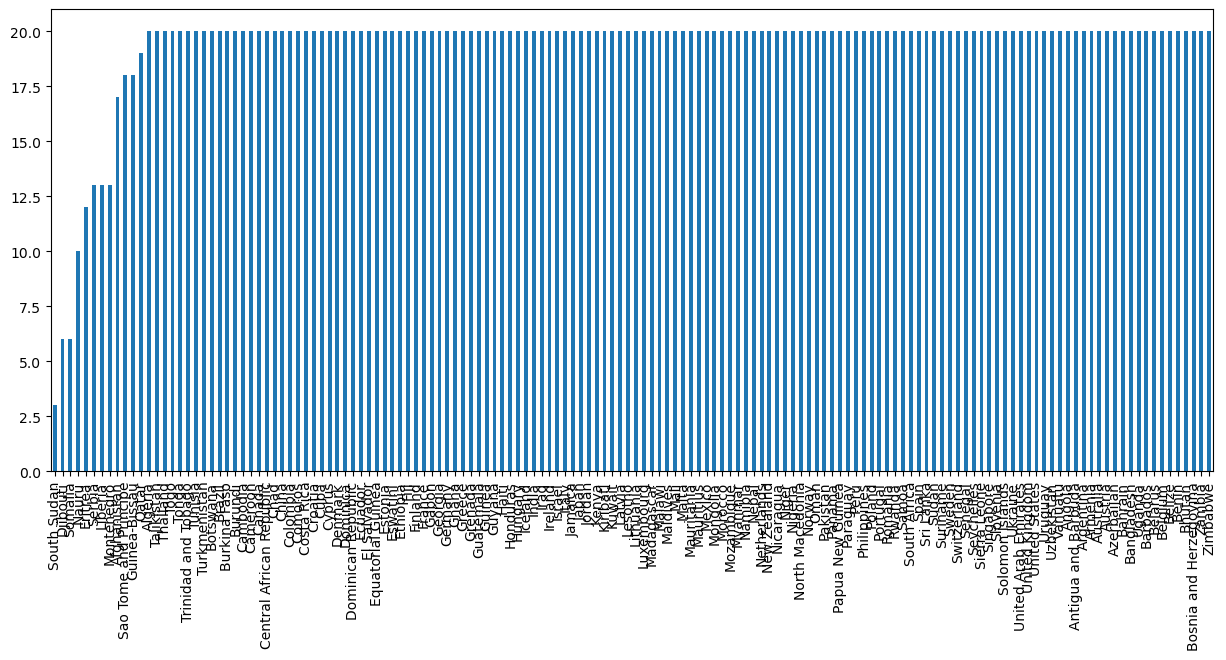

In [11]:
energy['Year'].value_counts().plot.bar()
plt.figure(figsize=(15,6))

energy['Entity'].value_counts().sort_values(ascending=True).plot.bar()
plt.tick_params(axis='x', rotation=90)

**Nous observons des disparités dans le nombre d'observations pour chaque année. Les années les plus anciennes présentent moins d'observations que les plus récentes, ce qui peut indiquer une amélioration dans la collecte des données au fil du temps. De plus, il est important de noter que nous n'avons pas le même nombre d'observations pour chaque pays. Certains pays, comme le South Sudan, ont significativement moins d'observations par rapport aux autres.**

#### <span style="color:blue">*II.2 Variables quantitatives* </span>

In [12]:
energyQuant=energy.iloc[:,2:] #On extrait que les variables quantitatives

Text(0, 0.5, 'Electricity Access (% Population)')

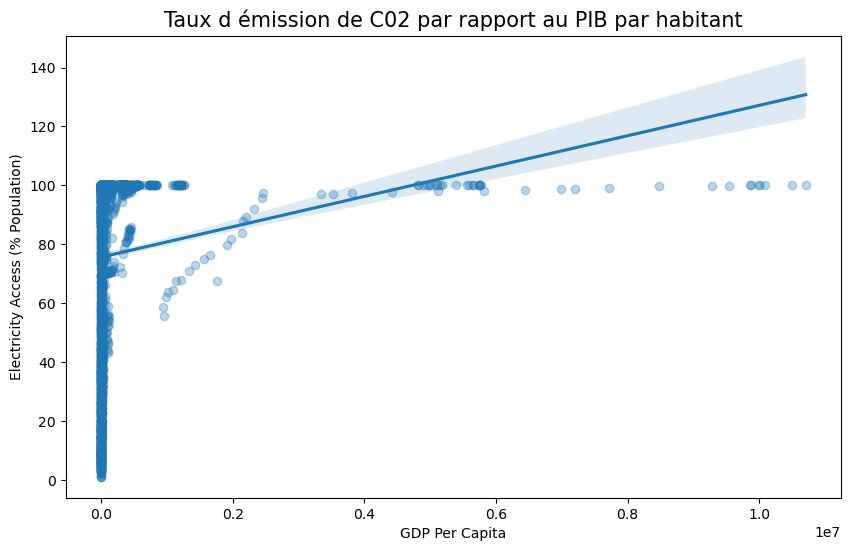

In [13]:
plt.figure(figsize=(10,6))
sns.regplot(x='Value_co2_emissions_kt_by_country', y='Access to electricity (% of population)', data=energy, scatter_kws={'alpha':0.3})
plt.title('Taux d émission de C02 par rapport au PIB par habitant', size=15)
plt.xlabel('GDP Per Capita')
plt.ylabel('Electricity Access (% Population)')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Access to electricity (% of population)'),
  Text(1, 0, 'Access to clean fuels for cooking'),
  Text(2, 0, 'Renewable energy share in the total final energy consumption (%)'),
  Text(3, 0, 'Electricity from nuclear (TWh)'),
  Text(4, 0, 'Electricity from renewables (TWh)'),
  Text(5, 0, 'Low-carbon electricity (% electricity)'),
  Text(6, 0, 'Primary energy consumption per capita (kWh/person)'),
  Text(7, 0, 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)'),
  Text(8, 0, 'Value_co2_emissions_kt_by_country'),
  Text(9, 0, 'gdp_growth'),
  Text(10, 0, 'gdp_per_capita'),
  Text(11, 0, 'Density'),
  Text(12, 0, 'Land Area(Km2)'),
  Text(13, 0, 'Latitude'),
  Text(14, 0, 'Longitude')])

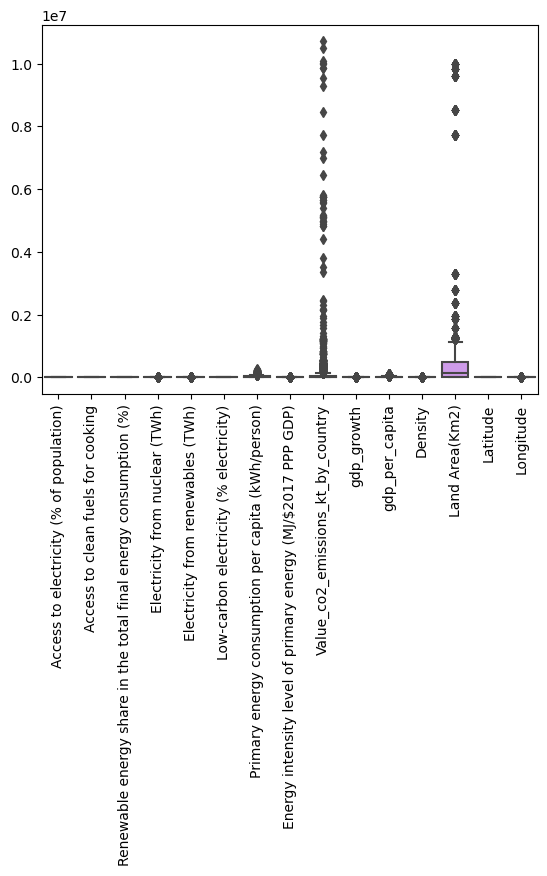

In [14]:
sns.boxplot(energyQuant)
plt.xticks(rotation=90)

**Nous notons que nos variables présentent non seulement des unités de mesure variées, mais aussi des échelles différentes. Certaines variables ont une importance relative plus élevée que d'autres. Afin d'homogénéiser nos données on va les centrer et les reduire.**

**Nous allons maintenant déterminer les variables qui présentent le plus d'outliers**

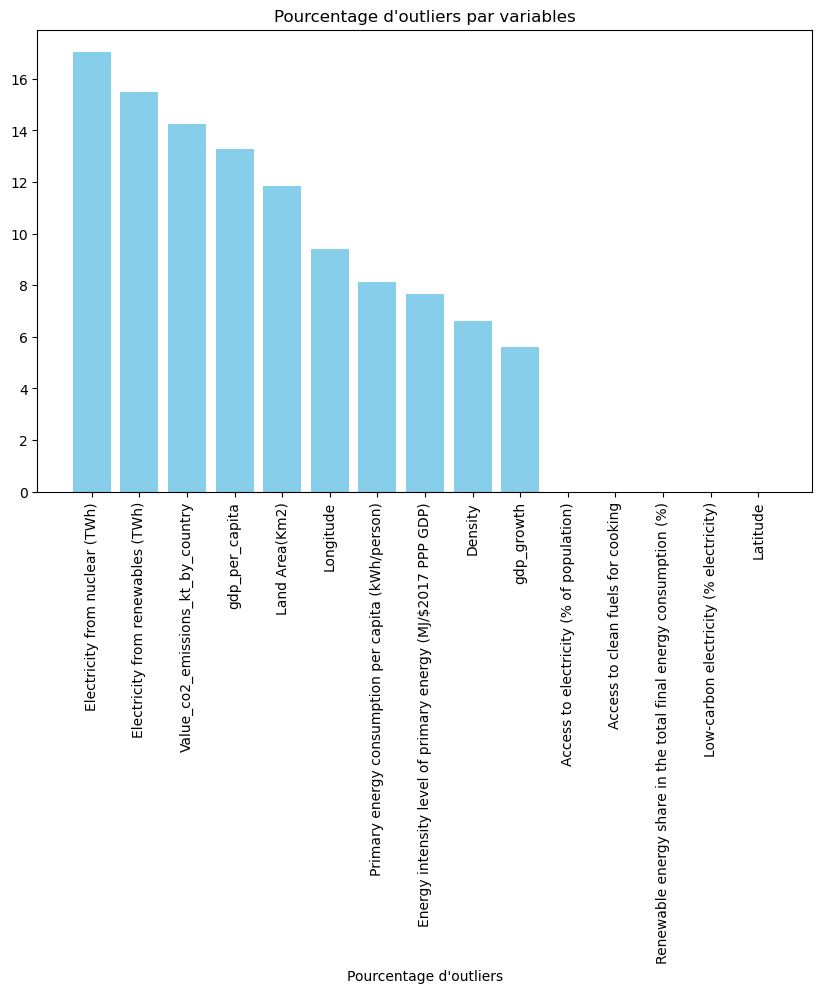

In [15]:

def percent_outliers(data): #renvoie
    percent_outliers_list = []
    for i in range(data.shape[1]): 
            q1 = np.percentile(data.iloc[:, i], 25)
            q3 = np.percentile(data.iloc[:, i], 75)
            iqr = q3 - q1
            bornes_inf = q1 - 1.5 * iqr
            bornes_sup = q3 + 1.5 * iqr
            outliers = data.iloc[:, i][(data.iloc[:, i] < bornes_inf) | (data.iloc[:, i] > bornes_sup)]
            percent_outliers = 100 * len(outliers) / len(data.iloc[:, i])
            percent_outliers_list.append((data.columns[i], percent_outliers))
    return percent_outliers_list

pourcentages_outliers = percent_outliers(energyQuant)

# Tri de la liste par ordre croissant en fonction du pourcentage d'outliers
pourcentages_outliers_tries = sorted(pourcentages_outliers, key=lambda x: x[1],reverse=True)


# Séparation des colonnes et des pourcentages
colonnes = [colonne for colonne, _ in pourcentages_outliers_tries]
pourcentages = [pourcentage for _, pourcentage in pourcentages_outliers_tries]

# Tracé du graphique à barres
plt.figure(figsize=(10, 6))
plt.bar(colonnes, pourcentages, color='skyblue')
plt.xlabel("Pourcentage d'outliers")
plt.title("Pourcentage d'outliers par variables")
plt.xticks(rotation=90)
plt.show()
        
    






**On remarque après analyse beacoup d'outliers au niveau des variables 'Electricity from fossil fuels', 'Electricity from nuclear' et 'Electricity from renewables'. Il contiennent plus 15% de valeurs aberrantes. Il est plausible que dans certains pays par rapport aux autres, ces sources d'énergie soient beaucoup plus abondantes et largement utilisées, ce qui peut entraîner des fluctuations  dans les données.**

**Nous allons maintenant observer la distribution de chaque variable en construisant un histogramme pour chacune d'entre elles.**.

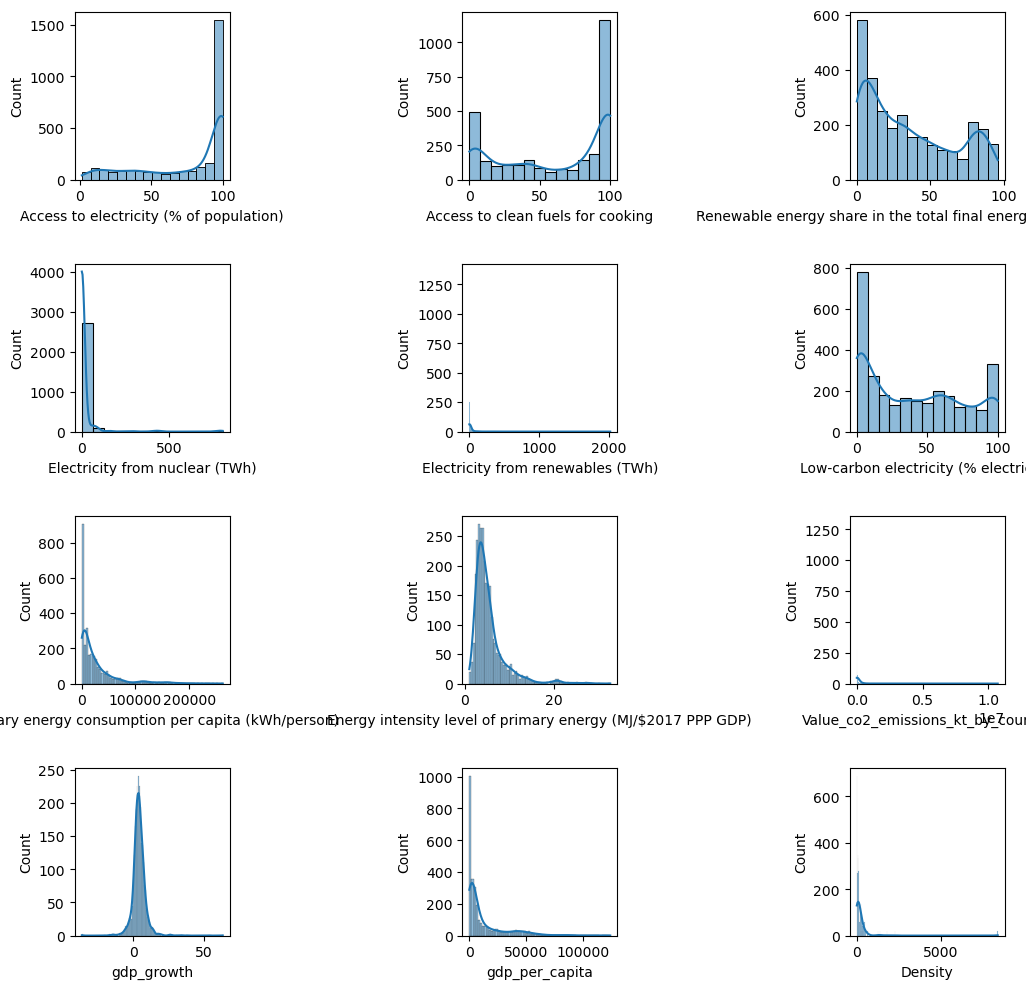

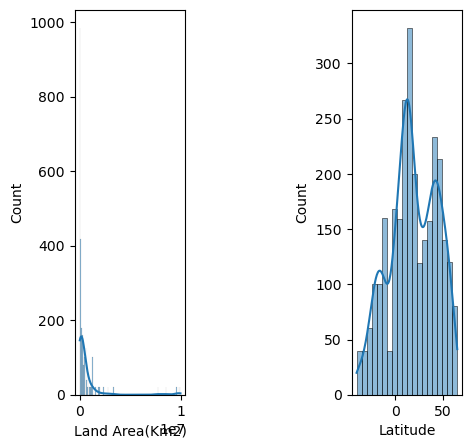

In [16]:
fig,ax=plt.subplots(4,3,figsize=(12, 12))
plt.subplots_adjust(wspace=1.5,hspace=0.5)
k=0
for i in range(4):
    for j in range(3):
        sns.histplot(energyQuant.iloc[:, k], kde=True, ax=ax[i, j])
        k+=1

plt.show()
fig,ax=plt.subplots(1,2,figsize=(5, 5))
plt.subplots_adjust(wspace=1.5,hspace=0.5)
for j in range(2):
    sns.histplot(energyQuant.iloc[:, k], kde=True, ax=ax[j])
    k+=1

**Nous remarquons que de nombreuses variables ne suivent pas une distribution gaussienne. Pour remédier à cela, nous allons appliquer des transformations logarithmiques ou racine carrée.**

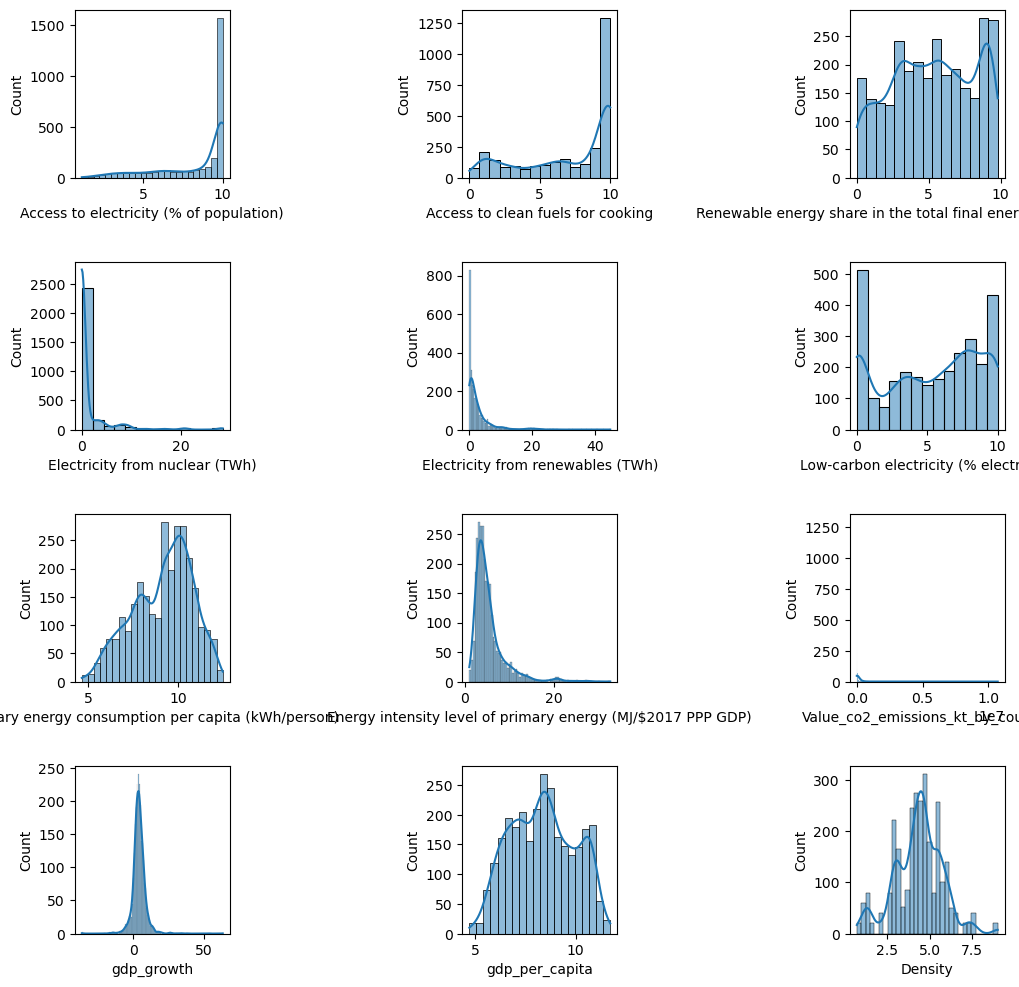

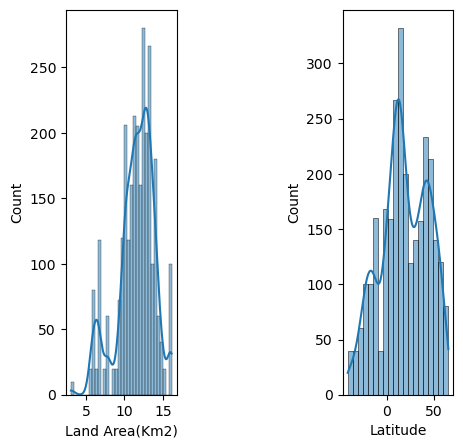

In [17]:
# Prendre la racine carrée des colonnes spécifiques
columns_sqrt = ["Access to electricity (% of population)",
                "Access to clean fuels for cooking",
                "Renewable energy share in the total final energy consumption (%)",
                "Electricity from nuclear (TWh)",
                "Electricity from renewables (TWh)",
                "Low-carbon electricity (% electricity)"]
energy[columns_sqrt] = np.sqrt(energy[columns_sqrt])

# Prendre le logarithme des colonnes spécifiques
columns_log = ["Primary energy consumption per capita (kWh/person)",
               "gdp_per_capita",
               "Density",
               "Land Area(Km2)"]
energy[columns_log] = np.log(energy[columns_log])

energyQuant=energy.iloc[:,2:]

fig,ax=plt.subplots(4,3,figsize=(12, 12))
plt.subplots_adjust(wspace=1.5,hspace=0.5)
k=0
for i in range(4):
    for j in range(3):
        sns.histplot(energyQuant.iloc[:, k], kde=True, ax=ax[i, j])
        k+=1

plt.show()
fig,ax=plt.subplots(1,2,figsize=(5, 5))
plt.subplots_adjust(wspace=1.5,hspace=0.5)
for j in range(2):
    sns.histplot(energyQuant.iloc[:, k], kde=True, ax=ax[j])
    k+=1

### <span style="color:blue">**II. Analyse multidimentionnelle** </span>

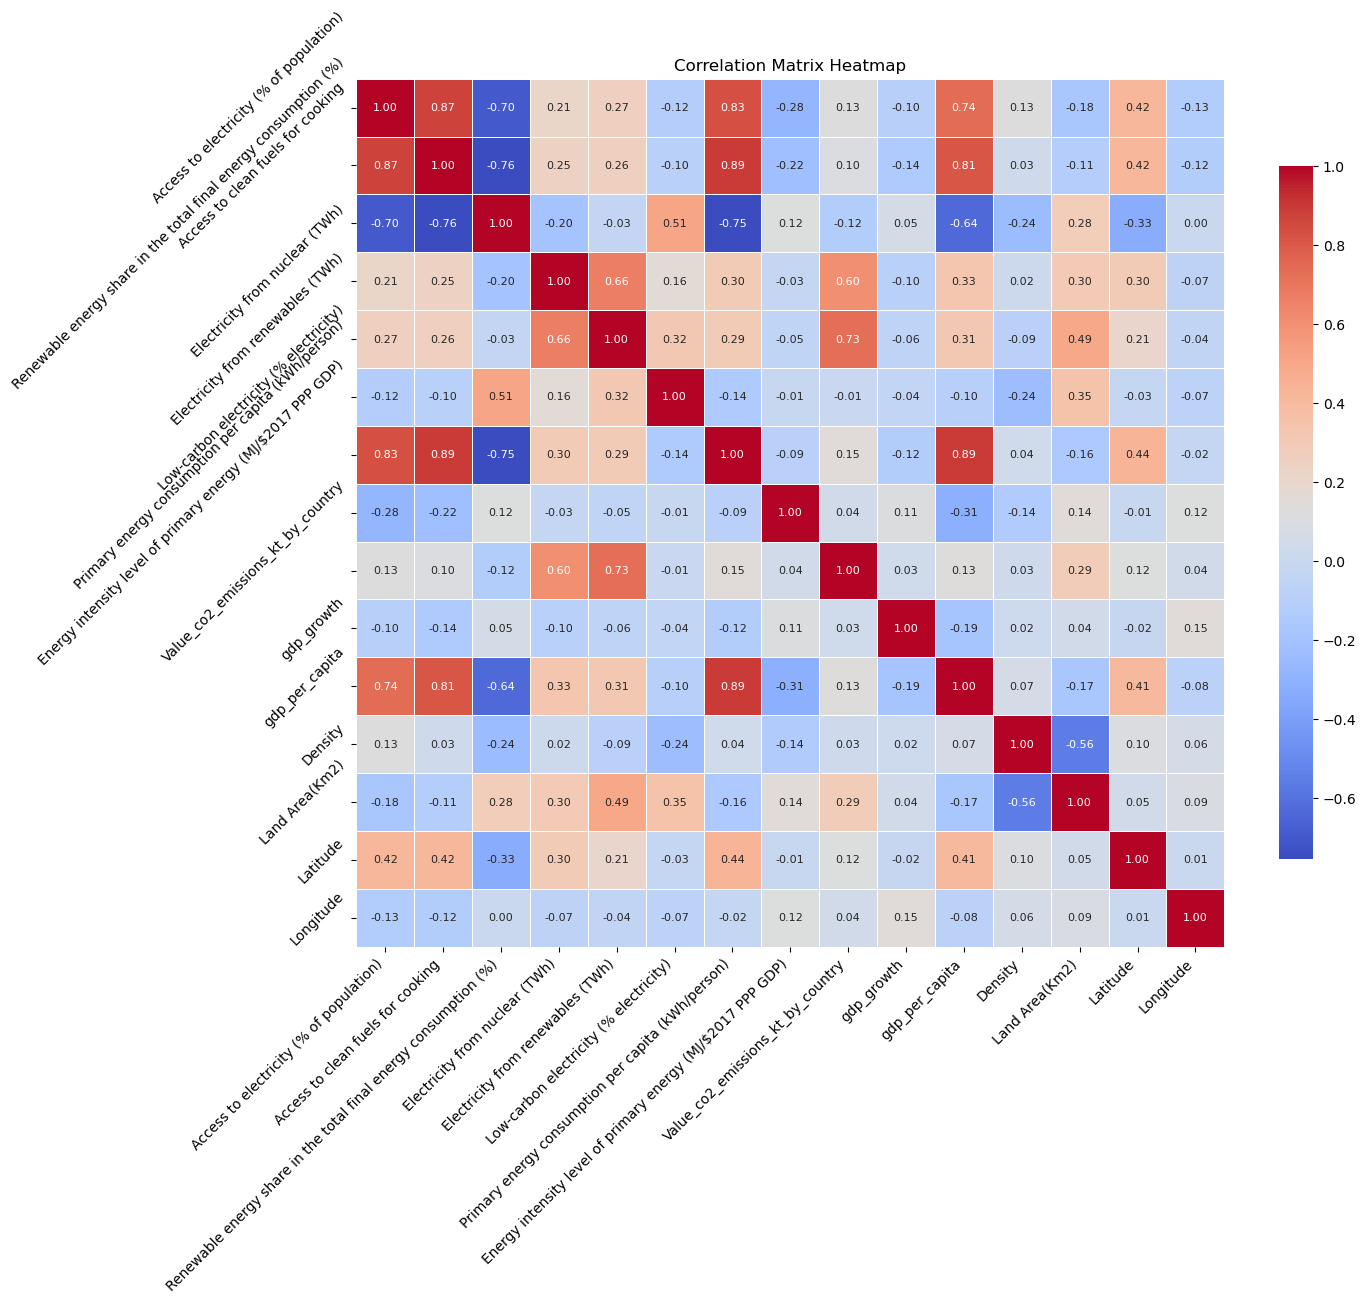

In [18]:
numeric_df = energy.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()
# Display the correlation matrix


# Increase the figure size for a clearer heatmap
plt.figure(figsize=(14, 12))
# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5,
            cbar_kws={"shrink": .75}, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns,
            annot_kws={"size": 8}, square=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.title('Correlation Matrix Heatmap')
plt.show()



<Axes: >

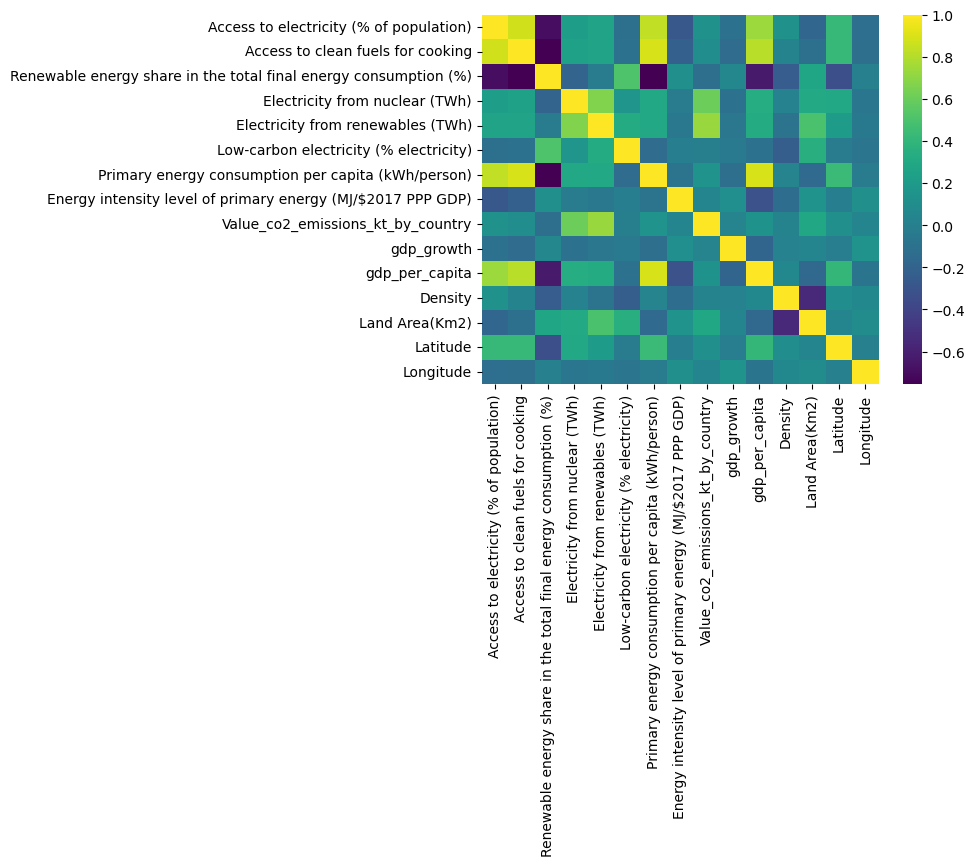

In [19]:
sns.heatmap(energyQuant.corr(), cmap='viridis')



**Selon le graphique de corrélation , on observe que la variable à prédire, la quantité d'émissions de CO2 par pays (Value_co2_emissions_kt_by_country), présente une corrélation plus significative avec la production d'électricité à partir de sources renouvelables, et dans une moindre mesure avec la production d'électricité d'origine nucléaire. Cependant, elle affiche une corrélation négative avec la proportion d'énergie renouvelable dans la consommation totale d'électricité.**
**La corrélation observée peut sembler contre-intuitive. Cependant, elle peut être expliquée par le fait que les pays plus riches ont souvent une capacité plus importante à investir dans le nucléaire et les énergies renouvelables. Ainsi, une plus grande production d'électricité à partir de ces sources pourrait être associée à des niveaux d'émissions de CO2 plus élevés, car des niveaux de richesse plus importante.**
**Par ailleurs, la corrélation négative entre les émissions de CO2 et la part d'énergie renouvelable dans la consommation d'électricité souligne l'importance des énergies propres pour réduire ces émissions.**

#### <span style="color:blue">b. Analyse en composantes principales</span>

**Nous allons réaliser une Analyse en Composantes Principales (ACP) sur l'ensemble de données, à l'exception de la variable que nous cherchons à prédire. L'objectif de cette analyse est de simplifier la complexité de nos données en réduisant leurs dimensions, tout en préservant au maximum leur structure et leurs informations essentielles.**

In [20]:
Value_co2_emissions_kt_by_country=np.log(energy['Value_co2_emissions_kt_by_country'])
data=energy.copy()  #Servira pour la carte du monde plus tard
energy.drop(['Value_co2_emissions_kt_by_country'],axis=1,inplace=True)
energyQuant.drop(['Value_co2_emissions_kt_by_country'],axis=1,inplace=True)
Value_co2_emissions_kt_by_country.reset_index(drop=True,inplace=True)
Value_co2_emissions_kt_by_country.index

RangeIndex(start=0, stop=2868, step=1)

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler=StandardScaler()
scaler.fit(energyQuant)
energyQuant1=scaler.transform(energyQuant)
pca=PCA()
energyQuant1_pca=pca.fit(energyQuant1).transform(energyQuant1)


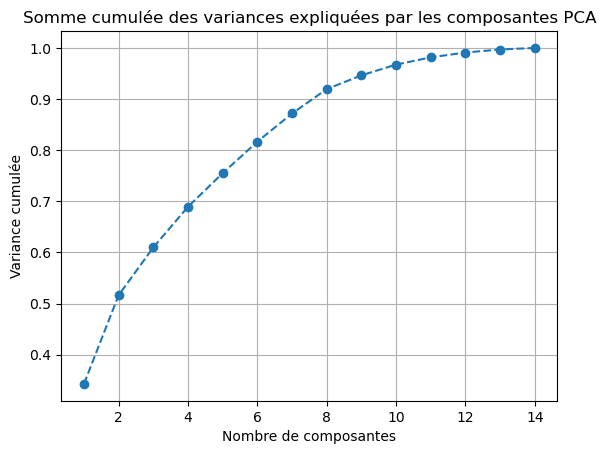

In [22]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Tracer la somme cumulée des variances
plt.plot(range(1,15),cumulative_variance,marker='o',linestyle="--")
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance cumulée')
plt.title('Somme cumulée des variances expliquées par les composantes PCA')
plt.grid(True)
plt.show()

**Nous constatons que 6 dimensions suffisent pour expliquer 80% de la variance dans nos données.**.

**On trace le graphe des individus colorié en fonction du taux d'émission de C02 , puis par le continent auquel les individus (pays) appartiennent**

In [23]:
import country_converter as coco
Continents= coco.convert(names=energy['Entity'], to='continent')


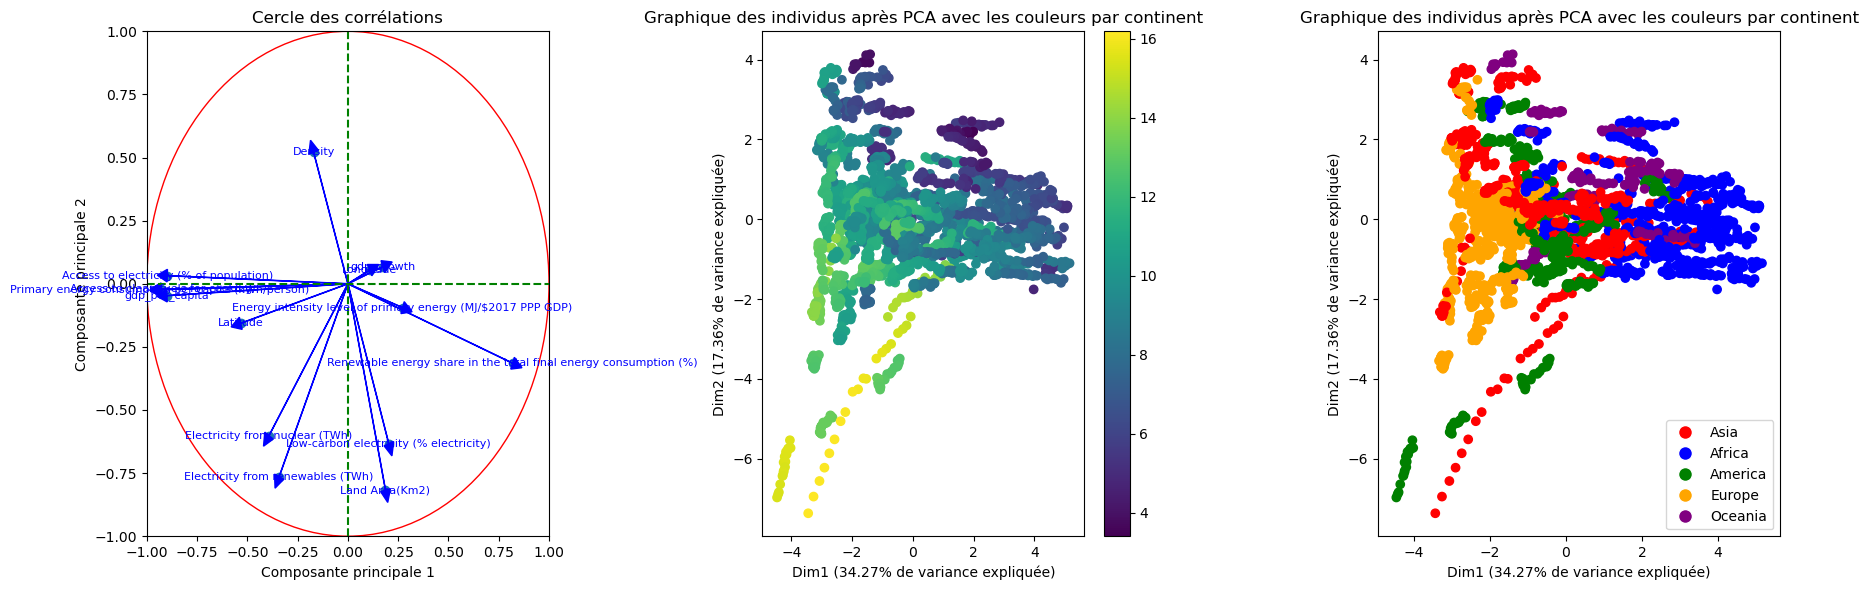

In [24]:
coord1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord2 = (-1)*pca.components_[1] * np.sqrt(pca.explained_variance_[1])

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Premier graphique : Cercle des corrélations
axes[0].scatter(coord1, coord2)
for i, j, nom in zip(coord1, coord2, energyQuant.columns):
    axes[0].text(i, j, nom, fontsize=8, ha='center', va='center', color='blue')
    axes[0].arrow(0, 0, i, j, color='blue', head_width=0.05, head_length=0.05)
axes[0].set_xlim(-1, 1)
axes[0].set_ylim(-1, 1)
axes[0].axhline(0, linestyle='dashed', color='green')
axes[0].axvline(0, linestyle='dashed', color='green')
cercle = plt.Circle((0, 0), radius=1, color='red', fill=False)
axes[0].add_patch(cercle)
axes[0].set_xlabel('Composante principale 1')
axes[0].set_ylabel('Composante principale 2')
axes[0].set_title('Cercle des corrélations')

# Deuxième graphique : Graphique des individus après PCA
sc=axes[1].scatter(energyQuant1_pca[:, 0], (-1)*energyQuant1_pca[:, 1], c=Value_co2_emissions_kt_by_country)
axes[1].set_xlabel(f'Dim1 ({pca.explained_variance_ratio_[0]*100:.2f}% de variance expliquée)')
axes[1].set_ylabel(f'Dim2 ({pca.explained_variance_ratio_[1]*100:.2f}% de variance expliquée)')
axes[1].set_title('Graphique des individus après PCA avec les couleurs par continent')
plt.colorbar(sc, ax=axes[1])

# Troisième graphique : Graphique des individus après PCA avec les couleurs par continent
continent_colors = {'Asia': 'red', 'Africa': 'blue', 'America': 'green', 'Europe': 'orange', 'Oceania': 'purple'}
colors = [continent_colors[continent] for continent in Continents]
axes[2].scatter(energyQuant1_pca[:, 0], (-1)*energyQuant1_pca[:, 1], c=[continent_colors[continent] for continent in Continents], label='Continents')
axes[2].set_xlabel(f'Dim1 ({pca.explained_variance_ratio_[0]*100:.2f}% de variance expliquée)')
axes[2].set_ylabel(f'Dim2 ({pca.explained_variance_ratio_[1]*100:.2f}% de variance expliquée)')
axes[2].set_title('Graphique des individus après PCA avec les couleurs par continent')

axes[2].legend(np.unique(Continents))
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=continent, 
                             markerfacecolor=color, markersize=10) 
                  for continent, color in continent_colors.items()]
axes[2].legend(handles=legend_handles)

plt.tight_layout()
plt.show()


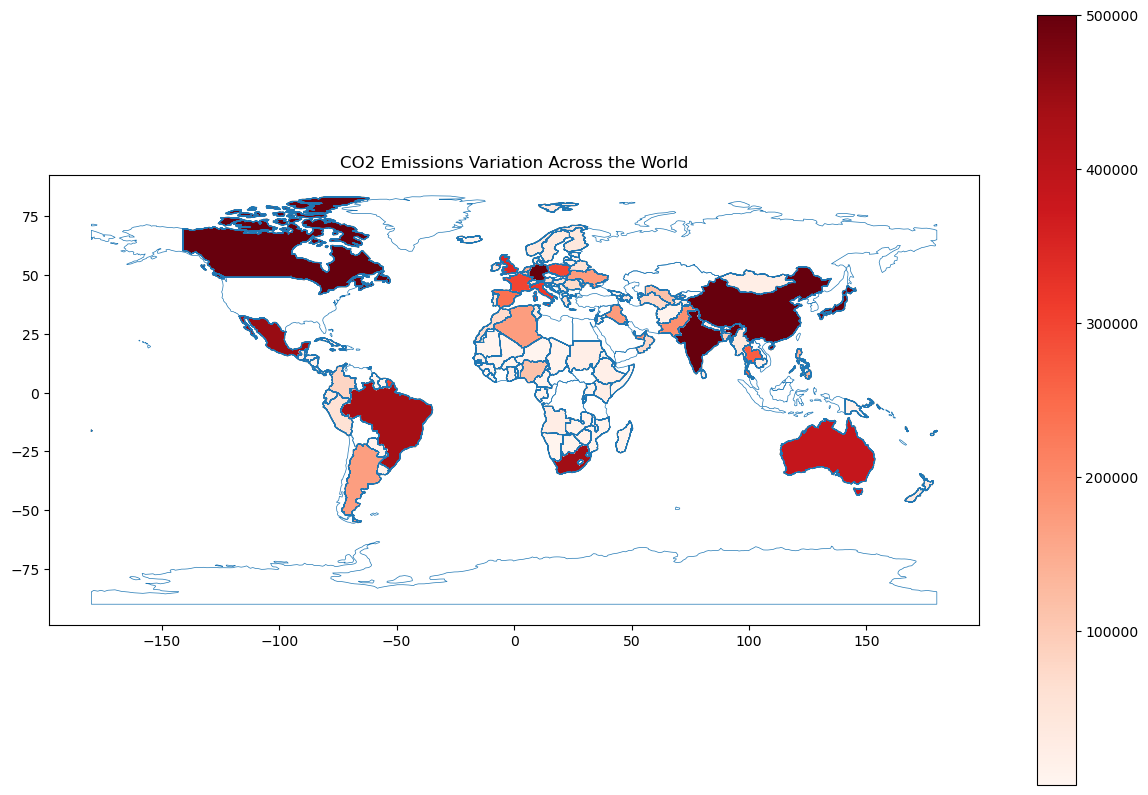

In [25]:


import geopandas as gpd

# Load the world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge world data with CO2 emissions data
world = world.merge(data[['Entity', 'Value_co2_emissions_kt_by_country']], how='left', left_on='name', right_on='Entity')

# Plot the world map
fig, ax = plt.subplots(figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=0.5)
world.plot(column='Value_co2_emissions_kt_by_country', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, vmin=100, vmax=500000) # Adjust the vmin and vmax values as needed
plt.title('CO2 Emissions Variation Across the World')
plt.show()



**Il est remarquable que les pays les plus pollueurs sont fortement corrélés avec la dimension 2, et également fortement corrélés négativement avec la dimension 1. Les émissions de CO2 sont ainsi négativement corrélées avec la dimension 1 et positivement avec la dimension 2.**

**Dans le graphique des individus, la plupart des pays européens se trouvent principalement du côté négatif de la dimension 1, tandis que les pays africains sont positivement corrélés. Quant aux pays asiatiques et américains, bien que des pays comme les États-Unis, la Chine et le Japon se positionnent aux extrémités négatives en raison de leurs fortes émissions de CO2, la plupart des autres pays de ces continents se situent du côté positif. Cette observation corrobore l'idée que la pollution est liée à la richesse, comme suggéré par la matrice de corrélation. Le PIB par habitant est d'ailleurs fortement corrélé négativement à la dimension. Ainsi1il y'ant un lien significatif entrlate dimensio1 n et la richessdesdu pays.**

**Quant à la dimension 2, elle est positivement corrélée avec la taille du pays (Land Area), la quantité d'électricité renouvelable, nucléaire et bas carbone. Le graphique des individus révèle également une corrélation positive entre la quantité de CO2 émise et la dimension 2, suggérant ainsi que cette dimension pourrait être associée à l'accès à l'électricité.**

### <span style="color:blue">**III. Modélisations** </span>

In [26]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score


In [27]:
energy.reset_index(drop=True,inplace=True)
energyQuant.reset_index(drop=True,inplace=True)

**Les variables Entiy et Year possédant trop de modalités on va passer à un modèle simplifié ou les pays sont regroupés par continent et les années par période quadriennale pour faciliter la modélisation linéaire et son interprètation.**

In [28]:
energy2=energy.copy()
energy2['Year']=energy2['Year'].astype(int)

bins = [2000, 2004, 2008, 2012, 2016, 2020]

# Étiquettes pour les intervalles
labels = ['2000-2004', '2004-2008', '2008-2012', '2012-2016', '2016-2020']

# Ajouter la nouvelle variable qualitative au DataFrame
energy2['Periode'] = pd.cut(energy2['Year'], bins=bins, labels=labels, right=False)

# Afficher les premières lignes pour vérifier
energy2.drop(columns=['Year'],inplace=True)

energy2['Continent']= coco.convert(names=energy2['Entity'], to='continent')
energy2.drop(columns=['Entity'],inplace=True)

energy2.head()




,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),gdp_growth,gdp_per_capita,Density,Land Area(Km2),Latitude,Longitude,Periode,Continent
0,3.839076,3.082207,6.054750,0.0,0.793725,8.186653,5.437941,1.40,8.832278,5.250617,4.094345,13.388153,33.93911,67.709953,2000-2004,Asia
1,4.479394,3.301515,6.651316,0.0,0.748331,7.932298,5.319253,1.20,1.414118,5.353667,4.094345,13.388153,33.93911,67.709953,2004-2008,Asia
2,5.038938,3.492850,5.820653,0.0,0.768115,7.964977,5.529703,1.41,11.229715,5.489067,4.094345,13.388153,33.93911,67.709953,2004-2008,Asia
3,5.542444,3.721559,5.647123,0.0,0.800000,8.728716,5.718411,1.50,5.357403,5.574940,4.094345,13.388153,33.93911,67.709953,2004-2008,Asia
4,6.004249,3.911521,5.364699,0.0,0.866025,8.885233,5.870087,1.53,13.826320,5.885251,4.094345,13.388153,33.93911,67.709953,2004-2008,Asia


In [29]:
dataDum=pd.get_dummies(energy2[['Periode','Continent']]) #Transformation des variables qualitatives en indicatrice

energy2= pd.concat([dataDum, energyQuant], axis=1) 
energy2.head()

,Periode_2000-2004,Periode_2004-2008,Periode_2008-2012,Periode_2012-2016,Periode_2016-2020,Continent_Africa,Continent_America,Continent_Asia,Continent_Europe,Continent_Oceania,...,Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),gdp_growth,gdp_per_capita,Density,Land Area(Km2),Latitude,Longitude
0,1,0,0,0,0,0,0,1,0,0,...,0.793725,8.186653,5.437941,1.40,8.832278,5.250617,4.094345,13.388153,33.93911,67.709953
1,0,1,0,0,0,0,0,1,0,0,...,0.748331,7.932298,5.319253,1.20,1.414118,5.353667,4.094345,13.388153,33.93911,67.709953
2,0,1,0,0,0,0,0,1,0,0,...,0.768115,7.964977,5.529703,1.41,11.229715,5.489067,4.094345,13.388153,33.93911,67.709953
3,0,1,0,0,0,0,0,1,0,0,...,0.800000,8.728716,5.718411,1.50,5.357403,5.574940,4.094345,13.388153,33.93911,67.709953
4,0,1,0,0,0,0,0,1,0,0,...,0.866025,8.885233,5.870087,1.53,13.826320,5.885251,4.094345,13.388153,33.93911,67.709953


**Nous allons diviser le jeu de données en deux ensembles distincts : un ensemble d'apprentissage et un ensemble de test.**

In [30]:

scaler = StandardScaler()  



XTrain, XTest, YTrain, YTest = train_test_split(energy2, Value_co2_emissions_kt_by_country, test_size=0.2, random_state=111)
scaler.fit(XTrain)
Xr_train = scaler.transform(XTrain)

Xr_test = scaler.transform(XTest)

#### <span style="color:blue">**III.A Regression linéaire** </span>

#### <span style="color:blue">**III.A Régression linéaire sans sélection de variables** </span>

**La régression linéaire va modéliser la relation entre l'émission de CO2 $ Y $ (la variable à prédire) et les autres variables du jeu de données $ X_1, X_2, ..., X_n $ (les variables explicatives). Elle cherche à établir une relation linéaire entre les variables en ajustant les coefficients $ \beta_0, \beta_1, \beta_2, ..., \beta_n $ de manière à minimiser la somme des carrés des écarts entre les valeurs prédites par le modèle et les valeurs réelles observées.**

**La formule de la régression linéaire est la suivante :**

\
**$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n + \varepsilon$**
\

Où :
**- $ Y $ est la variable à prédire,**
**- $ X_1, X_2, ..., X_n $ les variables explicatives,**
**- $ \beta_0 $ est l'ordonnée à l'origine (le biais),**
**- $ \beta_1, \beta_2, ..., \beta_n $ sont les coefficients des variables explicatives,**
**- $ \varepsilon $ est l'erreur résiduelle qui représente la différence entre les valeurs prédites et les valeurs réelles.**


MSE = 0.09164238705131596
R-carré ajusté = 0.9826246217506529


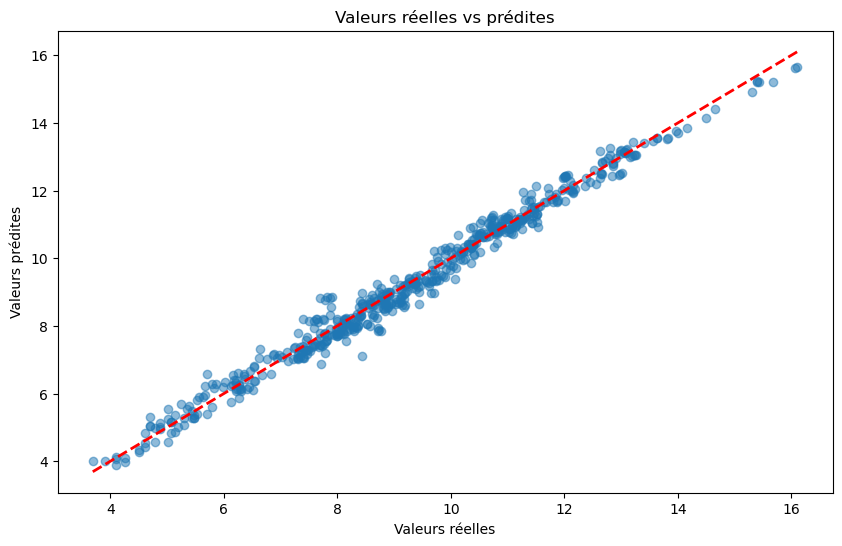

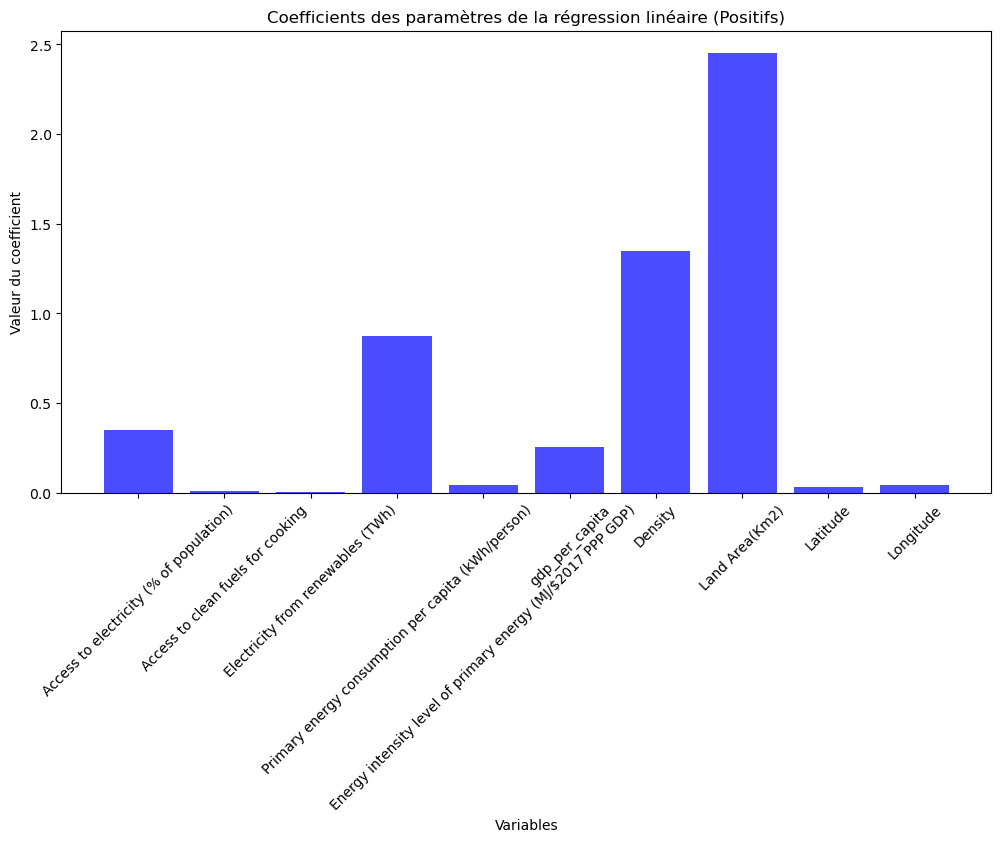

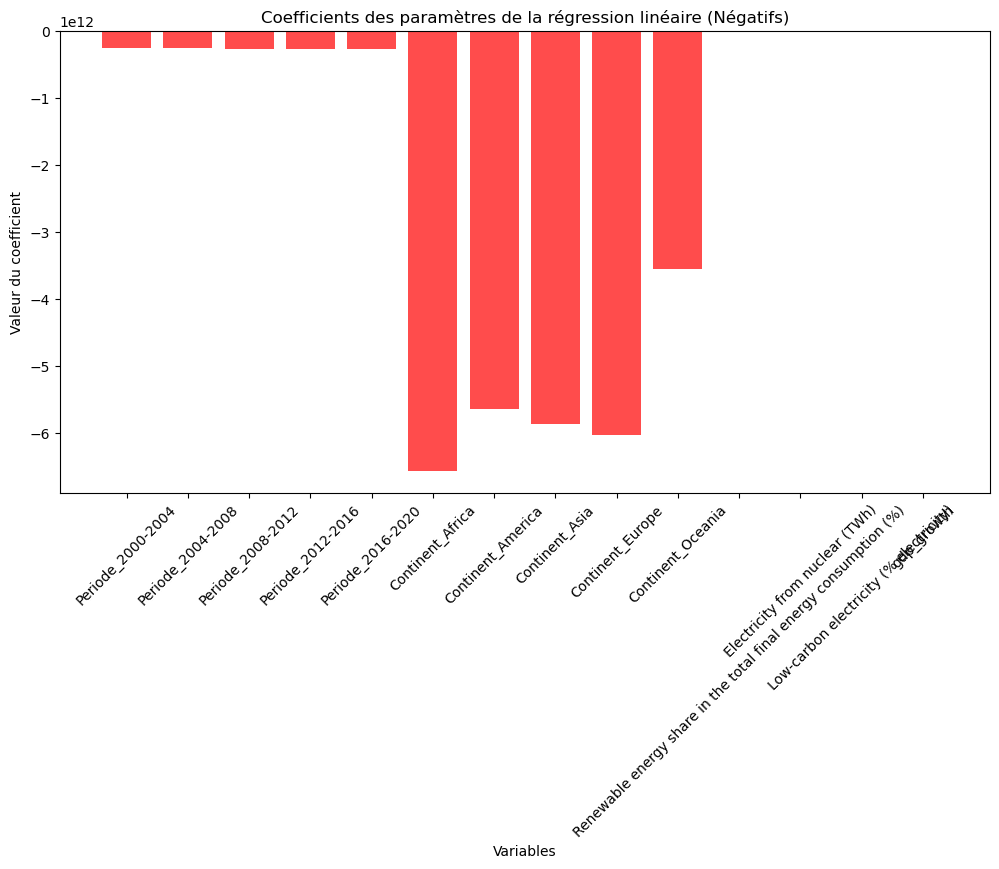

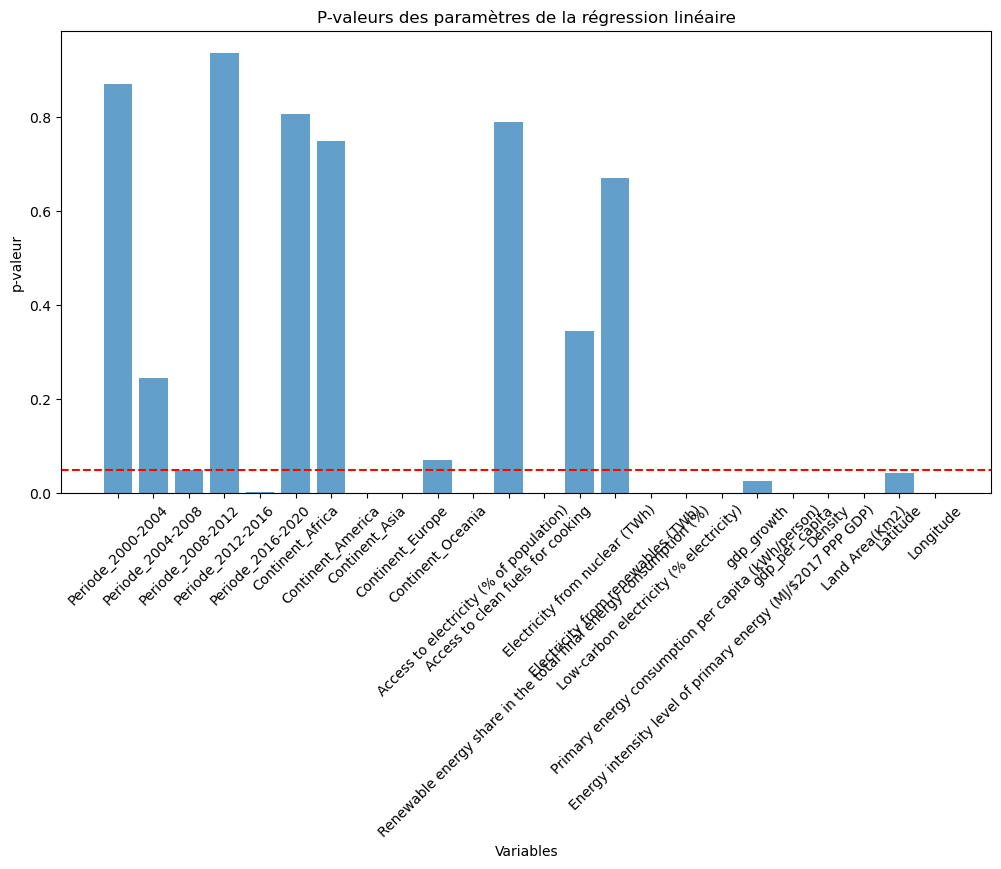

In [31]:
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
import pylab 
import statsmodels.api as sm


# Extraction des noms des colonnes de energy2
column_names = energy2.columns

Mse_M = {}
Time_M = {}

# Ajuster le modèle de régression linéaire
start_time = time.time()
regLin = LinearRegression()
regLin.fit(Xr_train, YTrain)
end_time = time.time()

# Faire des prédictions sur l'ensemble de test
y_chap_RL = regLin.predict(Xr_test)

# Calculer l'erreur quadratique moyenne (MSE)
RL_mse = mean_squared_error(YTest, y_chap_RL)

# Calculer le R-carré ajusté
n = Xr_test.shape[0]  # nombre d'observations
k = Xr_test.shape[1]  # nombre de variables
RL_R2 = r2_score(YTest, y_chap_RL)
RL_R2ajus = 1 - (1 - RL_R2) * (n - 1) / (n - k - 1)

# Enregistrer le temps écoulé
Time = end_time - start_time
print("MSE =", RL_mse)
print("R-carré ajusté =", RL_R2ajus)
Mse_M["RegLin"] = RL_mse
Time_M["RegLin"] = Time

# Tracer les valeurs estimées
plt.figure(figsize=(10, 6))
plt.scatter(YTest, y_chap_RL, alpha=0.5)
plt.plot([YTest.min(), YTest.max()], [YTest.min(), YTest.max()], 'r--', lw=2)
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Valeurs réelles vs prédites')
plt.show()

# Obtenir les coefficients des paramètres
coefficients = regLin.coef_

# Séparer les coefficients positifs et négatifs
positive_coeffs = coefficients[coefficients > 0]
negative_coeffs = coefficients[coefficients < 0]
positive_columns = column_names[coefficients > 0]
negative_columns = column_names[coefficients < 0]

# Tracer les coefficients positifs
plt.figure(figsize=(12, 6))
plt.bar(positive_columns, positive_coeffs, color='b', alpha=0.7)
plt.xlabel('Variables')
plt.ylabel('Valeur du coefficient')
plt.title('Coefficients des paramètres de la régression linéaire (Positifs)')
plt.xticks(rotation=45)
plt.show()

# Tracer les coefficients négatifs
plt.figure(figsize=(12, 6))
plt.bar(negative_columns, negative_coeffs, color='r', alpha=0.7)
plt.xlabel('Variables')
plt.ylabel('Valeur du coefficient')
plt.title('Coefficients des paramètres de la régression linéaire (Négatifs)')
plt.xticks(rotation=45)
plt.show()


# Calculer les p-valeurs des paramètres
X2 = sm.add_constant(Xr_train)  # ajouter une constante
est = sm.OLS(YTrain, X2)
est2 = est.fit()
p_values = est2.pvalues[1:]  # Ignorer la constante

# Tracer les p-valeurs de toutes les variables
plt.figure(figsize=(12, 6))
plt.bar(column_names, p_values, alpha=0.7)
plt.axhline(y=0.05, color='r', linestyle='--')
plt.xlabel('Variables')
plt.ylabel('p-valeur')
plt.title('P-valeurs des paramètres de la régression linéaire')
plt.xticks(rotation=45)
plt.show()


<Figure size 640x480 with 0 Axes>

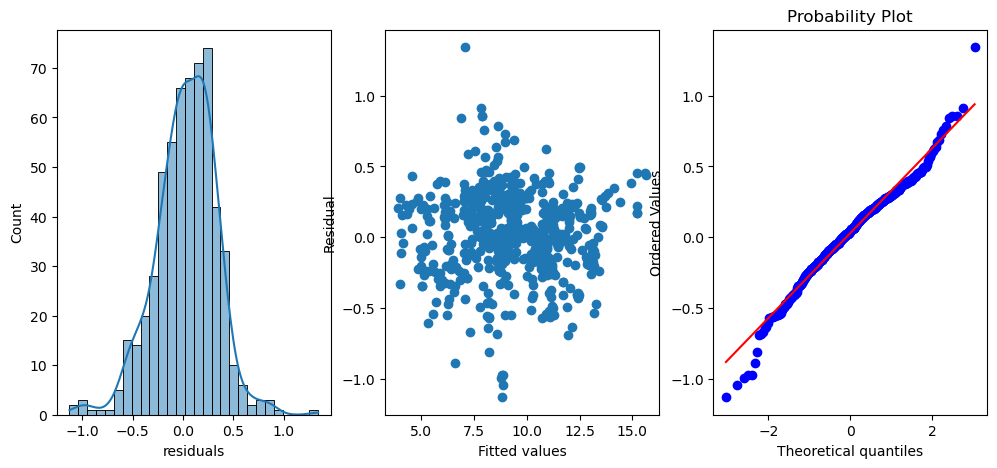

In [32]:
plt.subplots_adjust(wspace=0.5, hspace=1.5)
plt.figure(figsize=(12, 5))
plt.subplot(1,3,1)
sns.histplot(YTest-y_chap_RL,kde=True)
plt.ylabel('Count')
plt.xlabel('residuals')

plt.subplot(1,3,2)
plt.scatter(y_chap_RL,YTest-y_chap_RL)
plt.xlabel('Fitted values')
plt.ylabel('Residual')
plt.subplot(1,3,3)
stats.probplot(YTest-y_chap_RL, dist="norm", plot=pylab)
pylab.show()
plt.show()

#### <span style="color:blue">**III.A.3 Regression linéaire Lasso** </span>

**La régression linéaire avec la méthode du Lasso est une variation de la régression linéaire qui introduit une pénalité L1 sur les coefficients $\beta$. Cette pénalité permet de réduire certains coefficients à zéro, ce qui peut conduire à une sélection automatique des variables explicatives et à une forme de régularisation du modèle.**

**La formule de la régression linéaire avec la méthode du Lasso est la suivante :**

$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n + \varepsilon$$

**avec la contrainte additionnelle que la somme des valeurs absolues des coefficients des variables explicatives, pondérée par un paramètre de pénalisation $\lambda$, soit inférieure à un seuil :**

$$\sum_{i=1}^{n} |\beta_i| \leq s$$

**où $s$ est le seuil déterminé par le paramètre de pénalisation $\lambda$.**

**La fonction objectif à minimiser pour trouver les coefficients $\beta$ avec la méthode du Lasso est la suivante :**

$$\text{min} \left( \sum_{i=1}^{m} (Y_i - (\beta_0 + \sum_{j=1}^{n} \beta_j X_{ij}))^2 + \lambda \sum_{j=1}^{n} |\beta_j| \right)$$

**où $\lambda$ contrôle la force de la pénalité L1. Plus $\lambda$ est grand, plus la pénalisation est forte et plus de coefficients seront réduits à zéro. En revanche, si $\lambda$ est proche de zéro, la méthode du Lasso se rapproche de la régression linéaire classique.**

**En résumé, la méthode du Lasso est utile pour sélectionner les variables importantes et pour régulariser le modèle, ce qui peut améliorer sa capacité de généralisation aux données non vues.**


In [33]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Ajustement du modèle de régression Lasso
regLasso = Lasso()
regLasso.fit(Xr_train, YTrain)

# Prédiction sur l'ensemble de test
y_chap_lasso = regLasso.predict(Xr_test)

# Calcul de l'erreur quadratique moyenne
lasso_mse = mean_squared_error(YTest, y_chap_lasso)

# Calcul du R2 ajusté
n = len(YTest)
p = Xr_test.shape[1] # Nombre de prédicteurs
lasso_r2 = r2_score(YTest, y_chap_lasso)
lasso_r2_ajusté = 1 - (1 - lasso_r2) * ((n - 1) / (n - p - 1))

# Affichage du coefficient lambda choisi
lasso_lambda = regLasso.alpha
print("Coefficient lambda choisi par le modèle Lasso:", lasso_lambda)

print("MSE =", lasso_mse)
print("R2 ajusté =", lasso_r2_ajusté)
print("Time =", Time)


Coefficient lambda choisi par le modèle Lasso: 1.0
MSE = 3.687191832004859
R2 ajusté = 0.3009091663761122
Time = 0.04904341697692871


In [34]:
coef = pd.Series(regLasso.coef_, index = XTrain.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

variables_supprimees_nom = coef[coef != 0].index.tolist()
print("Variables conservé par Lasso : ", variables_supprimees_nom)


Lasso conserve 4 variables et en supprime 20
Variables conservé par Lasso :  ['Access to clean fuels for cooking', 'Electricity from renewables (TWh)', 'Primary energy consumption per capita (kWh/person)', 'Land Area(Km2)']


**La méthode lasso est moins précise que la régression linéaire malgrè un temps d'éxécution relativement similaire.Cependant on peut dégager en constatant les variables qu'elle conserve les variables les plus influentes de notre régression linéaire**



Text(0, 0.5, 'Residuals')

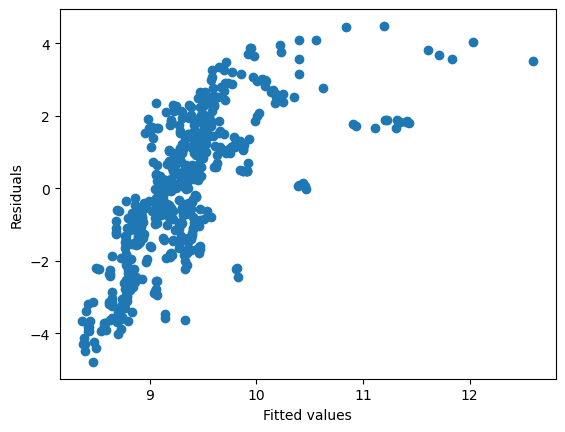

In [35]:
plt.scatter(y_chap_lasso,YTest-y_chap_lasso)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

In [36]:
from sklearn.model_selection import GridSearchCV
# grille de valeurs du paramètre alpha à optimiser

param=[{"alpha":[0,0.05,0.1,0.2,0.3,1,1.5]}]
regLasso = GridSearchCV(Lasso(), param,cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(Xr_train, YTrain)
# paramètre optimal
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))
warnings.filterwarnings('ignore')

/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model

Meilleur R2 = 0.980387, Meilleur paramètre = {'alpha': 0}


/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.968e+01, tolerance: 1.068e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


**La méthode de la recherche en grille avec [validation croisée](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) $(\textit{Grid Search Cross Validation})$ est une technique d'optimisation utilisée pour trouver les meilleurs hyperparamètres pour un modèle d'apprentissage automatique. Cette méthode consiste à spécifier une grille de valeurs pour les hyperparamètres à optimiser, puis à évaluer le modèle pour chaque combinaison d'hyperparamètres à l'aide de la validation croisée.**

**La grille des hyperparamètres est généralement définie à l'avance avec une liste de valeurs pour chaque hyperparamètre à ajuster. Ensuite, la validation croisée est utilisée pour évaluer les performances du modèle pour chaque combinaison d'hyperparamètres sur plusieurs partitions des données d'entrée**


**Le paramètre lambda sélectionné est de 0. L'absence de régularisation ($\lambda = 0$) implique que la méthode Lasso ne pénalise pas les coefficients et fonctionne essentiellement comme une régression linéaire classique. Étant donné que la régression linéaire sans sélection de variables est déjà assez précise sur ces données, le Lasso ne sélectionne aucune variable supplémentaire. Ainsi, le modèle Lasso réduit simplement à une régression linéaire ordinaire dans ce cas.**


### <span style="color:blue"> **III.B SVM**  </span>

**La régression avec les machines à vecteurs de support [(SVM)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) est une technique d'apprentissage supervisé utilisée pour la prédiction de valeurs continues.**

**Dans le cas de la régression, supposons que nous ayons un ensemble de données d'entraînement $\{(x_1, y_1), (x_2, y_2), ..., (x_m, y_m)\}$ où $x_i$ représente les caractéristiques d'un exemple et $y_i$ est la valeur cible correspondante.**

**L'objectif de la régression SVM est de trouver la fonction de régression qui s'ajuste aux données tout en maximisant la marge autour de l'hyperplan. Contrairement à la classification, où l'hyperplan vise à séparer les classes, en régression, l'hyperplan essaie de minimiser l'erreur de prédiction tout en maintenant une marge tolérable.**

**Mathématiquement, la fonction de régression avec SVM peut être définie comme suit :**

$$ f(x) = \sum_{i=1}^{m} (\alpha_i - \alpha_i^*) K(x, x_i) + b $$

**où $\alpha_i$ et $\alpha_i^*$ sont les multiplicateurs de Lagrange, $K(x, x_i)$ est la fonction noyau qui mesure la similarité entre les exemples $x$ et $x_i$, et $b$ est le biais.**

**Dans le cas de la régression avec SVM, les paramètres du modèle sont optimisés pour minimiser la perte de régression tout en maintenant la marge maximale. Cela permet de construire un modèle robuste qui peut généraliser efficacement sur de nouvelles données.**



In [37]:
XTr_svm, XT_svm, YTr_svm, YT_svm = train_test_split(energyQuant, Value_co2_emissions_kt_by_country, test_size=0.2, random_state=11)
scaler.fit(XTr_svm)
Xr_train_svm = scaler.transform(XTr_svm)

Xr_test_svm = scaler.transform(XT_svm)



<font color='red' size=4>Warning:</font> <font color='red' size=4>Ce code prend du temps. Prenez directement les résultats.Ils sont été préremplis dans la cellule suivante</font>


In [58]:
# Définition de la grille de paramètres étendue
from sklearn.model_selection import KFold
param_grid = {
    'epsilon': [0.01, 0.1, 1],
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1]
}

# Utilisation de neg_mean_squared_error pour le scoring
cv = KFold(n_splits=10, shuffle=True, random_state=11)
svm = GridSearchCV(SVR(kernel='rbf'), param_grid=param_grid, cv=cv, n_jobs=-1, scoring='neg_mean_squared_error')
svmOpt = svm.fit(Xr_train_svm, YTr_svm)

# Affichage des meilleurs paramètres et du score de validation croisée
print("Meilleur score (MSE) = %f, Meilleurs paramètres = %s" % (-svmOpt.best_score_, svmOpt.best_params_))



Meilleur score (MSE) = 0.027370, Meilleurs paramètres = {'C': 10, 'epsilon': 0.01, 'gamma': 0.1}


In [66]:
# Définition de la grille de paramètres pour le modèle SVR avec kernel 'poly'
param_grid = {
    'coef0': [2, 3, 4,],
    'degree': [2, 3, 4],
    'C': [0.4, 0.6]
}

# Utilisation de GridSearchCV pour trouver les meilleurs hyperparamètres
svm = GridSearchCV(SVR(epsilon=0.1, gamma='auto', kernel='poly'), param_grid=param_grid,scoring='neg_mean_squared_error' ,cv=10, n_jobs=-1)
svmOpt = svm.fit(Xr_train_svm, YTr_svm)

# Affichage des meilleurs paramètres et du score de validation croisée
print("Meilleur score = %f, Meilleurs paramètres = %s" % (- svmOpt.best_score_, svmOpt.best_params_))


Meilleur score = 0.005133, Meilleurs paramètres = {'C': 0.4, 'coef0': 2, 'degree': 4}


In [43]:
 """from sklearn.svm import SVR

param_grid = {
    'coef0': [2, 3, 4, 5, 6, 7, 12, 15],
    'degree': [2, 3, 4, 5, 6],
    'C': [0.4, 0.5, 0.6, 0.8, 1, 1.4, 10, 15]
}

svm = GridSearchCV(SVR(epsilon=0.1, gamma='auto',kernel='linear'), param_grid=param_grid, cv=10, n_jobs=-1)
svmOpt = svm.fit(Xr_train_svm, YTr_svm)

# Affichage des meilleurs paramètres et score
print("Meilleur score = %f, Meilleurs paramètres = %s" % (1. - svmOpt.best_score_, svmOpt.best_params_))"""

Meilleur score = 0.020978, Meilleurs paramètres = {'C': 0.4, 'coef0': 2, 'degree': 2}


In [67]:
svm=SVR(kernel='poly',gamma=0.06,  C=0.4, epsilon=0.1,coef0=2,degree=4)

### Explication des paramètres de SVR

Le modèle `SVR` (Support Vector Regression) utilise plusieurs paramètres pour contrôler son comportement et son efficacité. Voici une explication de chaque paramètre spécifié dans `SVR(kernel='rbf', degree=1, gamma=0.06, coef0=0, C=45, epsilon=0.01)` :

- **`kernel='poly'`** :
  - Spécifie le type de noyau à utiliser. Le noyau polynomial est choisi.
- **`degree=4`** :
  - Spécifie le degré du noyau polynomial. Ignoré lorsque le noyeau est radial.

- **`gamma=0.06`** :
  - Contrôle l'influence d'un seul exemple d'entraînement. Une valeur faible de `gamma` signifie une large portée, tandis qu'une valeur élevée signifie une portée plus étroite. Pour le noyau RBF, une valeur appropriée de `gamma` est cruciale pour éviter le surapprentissage ou le sous-apprentissage.

- **`coef0=0.4`** :
  - Utilisé uniquement avec les noyaux polynomial et sigmoïdal, il représente le terme indépendant dans la fonction de noyau. Ignoré ici car le noyau est `rbf`.

- **`C=0.4`** :
  - Paramètre de régularisation qui contrôle le compromis entre une marge de décision large et le bon classement des exemples d'entraînement. Une valeur plus élevée de `C` indique une pénalité plus élevée pour les erreurs, potentiellement au risque de surapprentissage. Une valeur plus faible de `C` permet plus d'erreurs dans l'entraînement mais peut aider à éviter le surapprentissage.

- **`epsilon=0.01`** :
  - Définit une zone autour de la fonction cible dans laquelle les erreurs sont ignorées. Un petit `epsilon` signifie que le modèle doit être très précis, tandis qu'un grand `epsilon` tolère plus d'erreurs, simplifiant le modèle.


Time 1.0949008464813232
MSE= 11.316253839577396


<Figure size 640x480 with 0 Axes>

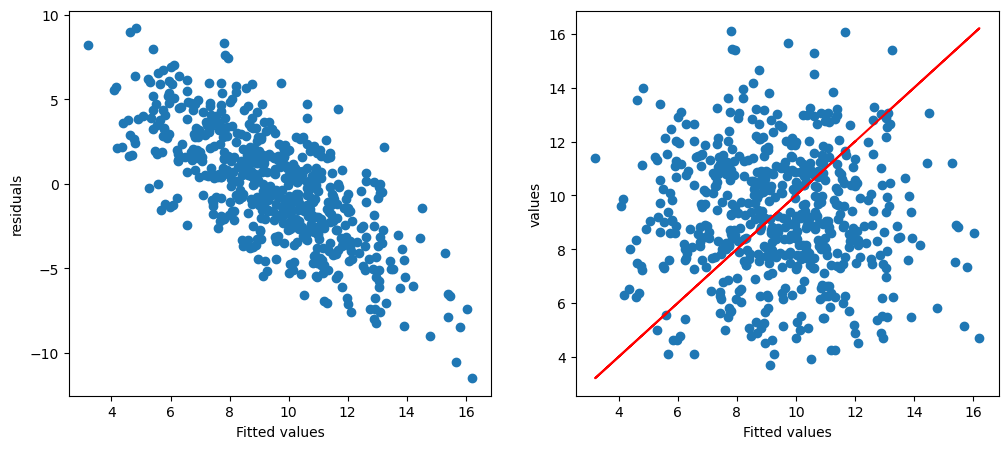

In [69]:
start=time.time()
svmOpt=svm.fit(Xr_train_svm, YTr_svm)
y_chap_svm = svmOpt.predict(Xr_test_svm)
svm_mse=mean_squared_error(y_chap_svm,YTest)
end=time.time()
Time=end-start
Mse_M["SVM"]=svm_mse
Time_M["SVM"]=Time
print("Time",Time)
print("MSE=",svm_mse)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap_svm,YTest-y_chap_svm)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap_svm,YTest)
plt.plot(y_chap_svm,y_chap_svm,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

### <span style="color:blue"> **III.C Cart**  </span>

**La régression avec les arbres de classification et de régression (CART) est une méthode d'apprentissage supervisé utilisée pour la prédiction de valeurs continues..**

**Dans le cas de la régression, nous avons un ensemble de données d'entraînement $\{(x_1, y_1), (x_2, y_2), ..., (x_m, y_m)\}$ où $x_i$ représente les caractéristiques d'un exemple et $y_i$ est la valeur cible correspondante.**

**L'objectif de la régression CART est de construire un arbre de décision qui partitionne l'espace des caractéristiques de manière à minimiser l'erreur de prédiction des valeurs cibles. Chaque nœud de l'arbre divise l'espace en sous-espaces plus petits en fonction d'une règle de partitionnement, généralement basée sur une mesure de pureté comme l'indice de Gini ou l'erreur quadratique moyenne.**

**Mathématiquement, un arbre de régression CART peut être défini par une série de règles de décision basées sur les caractéristiques des données. L'arbre est construit de manière récursive en choisissant à chaque étape la variable de caractéristique et la valeur de seuil qui minimise l'erreur de prédiction.**

**En résumé, la régression avec CART est une méthode flexible et interprétable pour modéliser des relations complexes entre les variables d'entrée et les valeurs de sortie. Elle est particulièrement adaptée aux ensembles de données de grande dimension et peut être efficace même en présence de non-linéarités et d'interactions entre les caractéristiques.**


In [74]:
from sklearn.tree import DecisionTreeRegressor


# Définition de la grille de paramètres pour le modèle DecisionTreeRegressor
param_grid = {
    'max_depth': list(range(2, 30))
}

# Utilisation de GridSearchCV pour trouver les meilleurs hyperparamètres
tree = GridSearchCV(DecisionTreeRegressor(), param_grid=param_grid, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
treeOpt = tree.fit(Xr_train, YTrain)

# Affichage des meilleurs paramètres et du score de validation croisée
print("Meilleur score (MSE) = %f, Meilleur paramètre = %s" % (-treeOpt.best_score_, treeOpt.best_params_))



Meilleur score (MSE) = 0.071596, Meilleur paramètre = {'max_depth': 25}


PARAMÉTRE OPTIMISÉ:

$\textbf{max\_depth}$:
**La profondeur maximale de l'arbre de décision. Cela contrôle la complexité de l'arbre en déterminant le nombre maximum de niveaux que l'arbre peut avoir. Une profondeur plus élevée peut conduire à un surapprentissage, tandis qu'une profondeur plus faible peut entraîner un sous-apprentissage.**

In [75]:
DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth=25)
treeOpt=tree.fit(Xr_train, YTrain)


In [76]:
treeOpt.score(Xr_test,YTest)

-0.0639386863600214

Time=  0.002509593963623047
MSE= 0.0639386863600214


<Figure size 640x480 with 0 Axes>

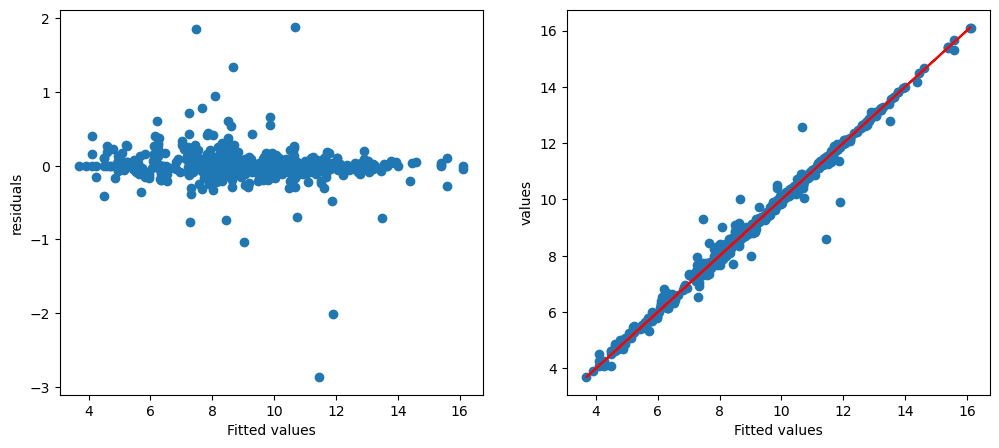

In [77]:
Start=time.time()
y_chap_cart = treeOpt.predict(Xr_test)
cart_mse=mean_squared_error(y_chap_cart,YTest)
end=time.time()
Time=end-Start
Mse_M["Cart"]=cart_mse
Time_M["Cart"]=Time
print("Time= ",Time)
print("MSE=",cart_mse)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap_cart,YTest-y_chap_cart)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap_cart,YTest)
plt.plot(y_chap_cart,y_chap_cart,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

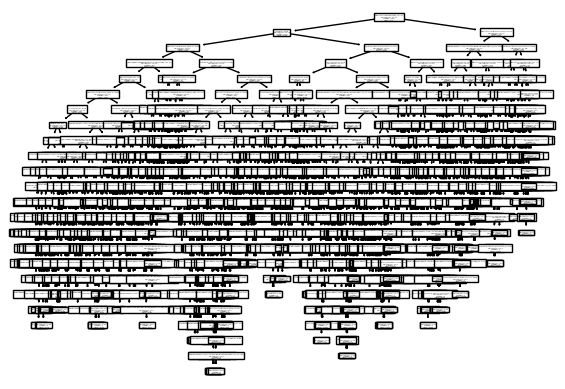

In [80]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
treeG=DecisionTreeRegressor(max_depth=treeOpt.best_params_['max_depth'])
treeG.fit(Xr_train,YTrain)
plot_tree(treeG,feature_names=energy2.columns.tolist());
plt.show()

### <span style="color:blue"> **III.D Random forest**  </span>

In [84]:
 from sklearn.ensemble import RandomForestRegressor 
import time
start_time = time.time()
# définition des paramètres
forest = RandomForestRegressor(n_estimators=500,  max_depth=None,
   min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=None,
   bootstrap=True, oob_score=True)
# apprentissage
rfFit = forest.fit(Xr_train,YTrain)
#Erreur Out Of Bag
print(1-rfFit.oob_score_)
end_time = time.time()
# Calculate execution time
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

0.003588762485213892
Execution time: 7.982520818710327 seconds


In [ ]:
 # erreur de prévision sur le test
1-rfFit.score(Xr_test,YTest)

In [ ]:
# param=[{"n_estimators":list(range(1,500,50))}]
# rf= GridSearchCV(RandomForestRegressor(n_estimators=100),
#         param,cv=5,n_jobs=-1)
# rfOpt=rf.fit(Xr_train, YTrain)
# # paramètre optimal
# print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

In [ ]:
param=[{"max_features":list(range(2,20,2))}]
rf= GridSearchCV(RandomForestRegressor(n_estimators=100),
        param,cv=5,n_jobs=-1)
rfOpt=rf.fit(Xr_train, YTrain)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

In [ ]:
# Importance décroissante des variables
importances = rfFit.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(Xr_train.shape[1]):
    print(df.columns[indices[f]], importances[indices[f]])

In [ ]:
# définition des paramètres
start=time.time()
forest = RandomForestRegressor(n_estimators=351,  max_depth=None,
   min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=None,
   bootstrap=True, oob_score=True,max_features=12)
# apprentissage
rfFit = forest.fit(XTrain,YTrain)
end=time.time()
Time=end-start
Time_M["RandomForest"]=Time
#Erreur Out Of Bag
print(1-rfFit.oob_score_)



In [ ]:
 # Graphe des importances
plt.figure()
plt.title("Importance des variables")
plt.bar(range(Xr_train.shape[1]), importances[indices]);
plt.xticks(range(Xr_train.shape[1]), indices);
plt.xlim([-1, Xr_train.shape[1]]);
plt.show()

In [ ]:
y_chap_rf = forest.predict(XTest)
rf_mse=mean_squared_error(y_chap_rf,YTest)
Mse_M["RandomForest"]=rf_mse
print("MSE=",rf_mse)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap_rf,YTest-y_chap_rf)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap_rf,YTest)
plt.plot(y_chap_rf,y_chap_rf,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

### <span style="color:blue"> **III.E Réseaux de neurone**  </span>

In [91]:
 from sklearn.neural_network import MLPRegressor
    

In [93]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Définition de la grille des hyperparamètres
param_grid = {
    'hidden_layer_sizes': [(5,), (10,), (15,), (20,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# Initialisation de MLPRegressor
nnet = MLPRegressor(max_iter=2000)

# Utilisation de GridSearchCV pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(estimator=nnet, param_grid=param_grid, cv=10, n_jobs=-1)
s=time.time()
# Entraînement du modèle
grid_search.fit(Xr_train, YTrain)

# Prédiction sur l'ensemble de test
y_pred = grid_search.predict(Xr_test)

# Calcul de l'erreur quadratique moyenne
mse = mean_squared_error(YTest, y_pred)
end=time.time()
Time=end-s
Mse_M["NeuralNetwork"]=mse
Time_M["NeuralNetwork"]=Time
# Affichage des résultats
print("Mean Squared Error on Test Set:", mse)
print("Best parameters:", grid_search.best_params_)


Mean Squared Error on Test Set: 0.028355665629779016
Best parameters: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (15,), 'learning_rate_init': 0.01}


In [106]:
print(Mse_M)
print(Time_M)

{'RegLin': 0.09164238705131596, 'SVM': 11.316253839577396, 'Cart': 0.0639386863600214}
{'RegLin': 0.04904341697692871, 'SVM': 1.0949008464813232, 'Cart': 0.002509593963623047}


In [107]:

sorted_Mse_M = dict(sorted(Mse_M.items(), key=lambda item: item[1]))
sorted_Time_M = dict(sorted(Time_M.items(), key=lambda item: item[1]))


print("MSE trié :", sorted_Mse_M)
print("Temps trié :", sorted_Time_M)


MSE trié : {'Cart': 0.0639386863600214, 'RegLin': 0.09164238705131596, 'SVM': 11.316253839577396}
Temps trié : {'Cart': 0.002509593963623047, 'RegLin': 0.04904341697692871, 'SVM': 1.0949008464813232}


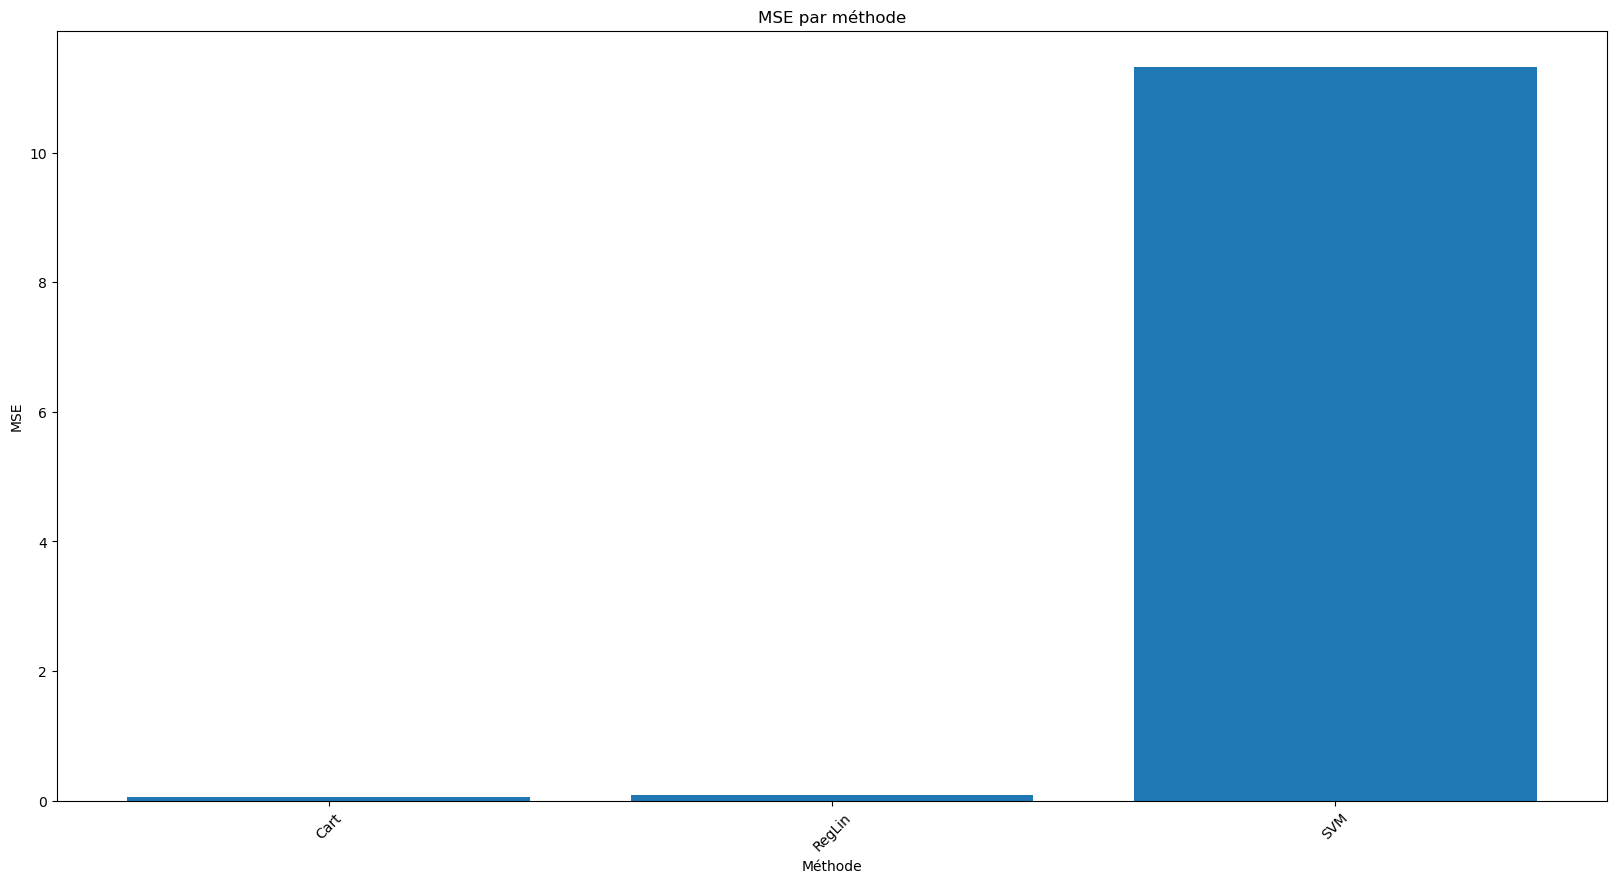

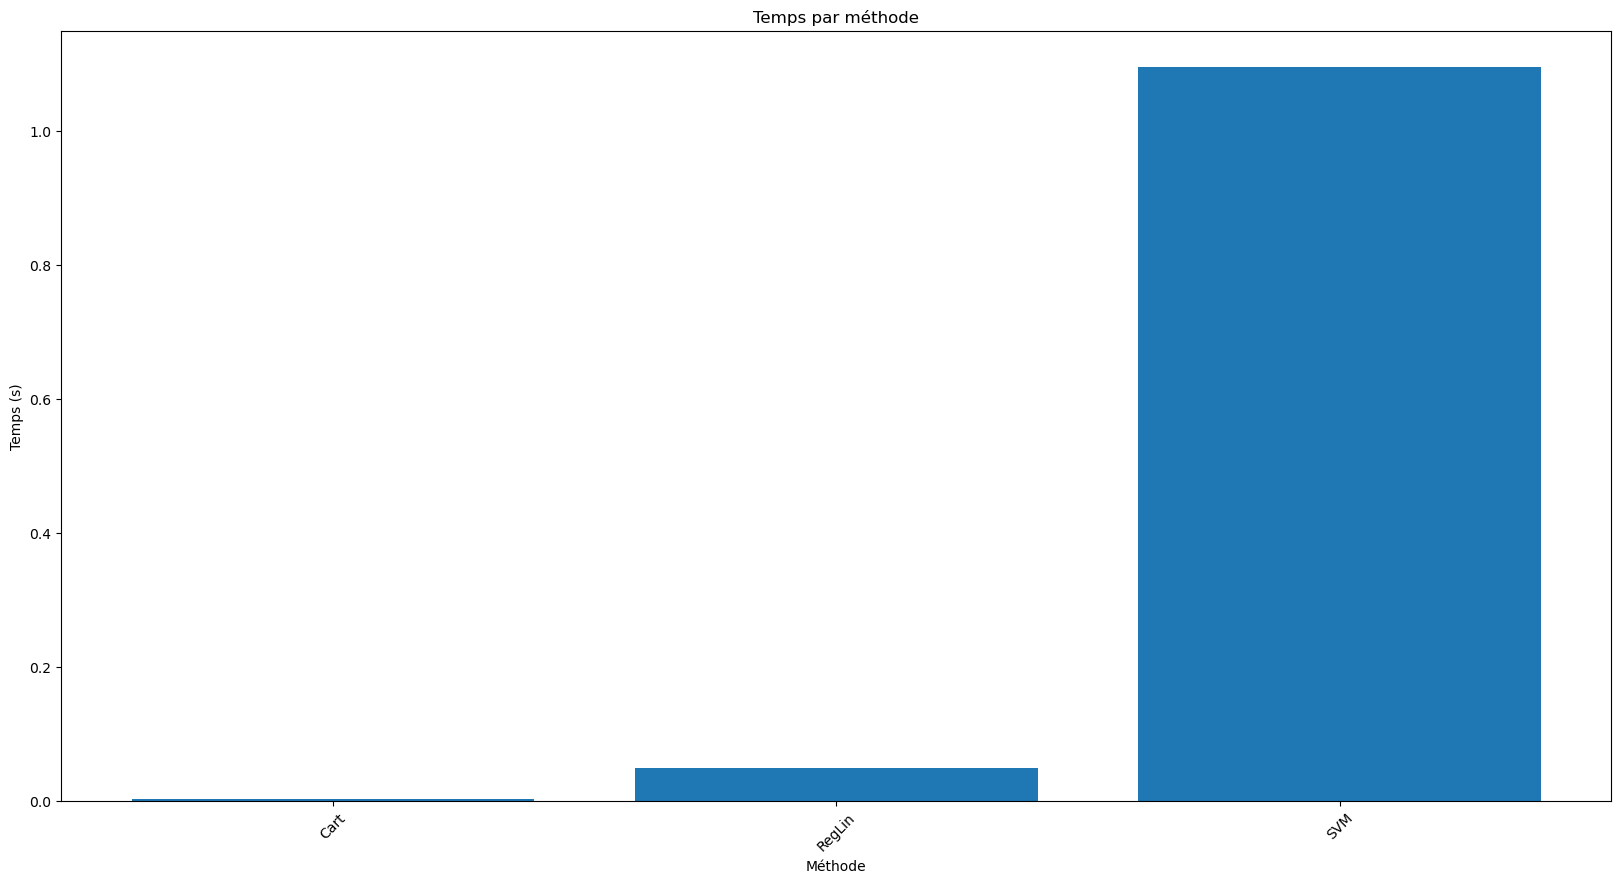

In [108]:
plt.figure(figsize=(20, 10))

# Plot du MSE par méthode
plt.bar(sorted_Mse_M.keys(), sorted_Mse_M.values())
plt.title('MSE par méthode')
plt.xlabel('Méthode')
plt.ylabel('MSE')
plt.xticks(rotation=45)  
plt.show()

# Plot du temps par méthode
plt.figure(figsize=(20, 10))
plt.bar(sorted_Time_M.keys(), sorted_Time_M.values())
plt.title('Temps par méthode')
plt.xlabel('Méthode')
plt.ylabel('Temps (s)')
plt.xticks(rotation=45)  
plt.show()


### APPENDICE : Comparaison des méthodes

In [104]:
from sklearn.utils import check_random_state
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Initialisation du générateur de nombres pseudo-aléatoires
check_random_state(13)
tps0 = time.perf_counter()

# Définition des estimateurs
lin_reg = LinearRegression()
dt_reg = DecisionTreeRegressor()
knn_reg = KNeighborsRegressor()
svr_poly = SVR(kernel='poly')  # SVR avec noyau polynomial
rf_reg = RandomForestRegressor()
# Initialisation à 0 des erreurs pour chaque méthode (colonne) et chaque itération (ligne)
B = 3  # ou 30 selon vos besoins
arrayErreur = np.empty((B, 6))  # On ajoute une colonne pour le réseau de neurones

# Définition des grilles de paramètres pour chaque méthode
listMethGrid = [
    [svr_poly, {"C": [0.4, 0.5, 0.6, 0.8, 1, 1.4], "degree": [2, 3, 4]}],  # Paramètres spécifiques pour SVR
    [rf_reg, {"n_estimators": [50, 100, 150]}],
    [knn_reg, {"n_neighbors": list(range(1, 15))}],
    [dt_reg, {"max_depth": list(range(2, 10))}],
    [MLPRegressor(max_iter=2000), {
        'hidden_layer_sizes': [(5,),  (15,)],
        'activation': ['relu', 'logistic'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate_init': [0.001, 0.01, 0.1]
    }]
]

for i in range(B):
    # extraction apprentissage et test
    X_train, X_test, Y_train, Y_test = train_test_split(energyQuant, Value_co2_emissions_kt_by_country, test_size=200)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    # Optimisation de chaque méthode et calcul de l'erreur sur le test
    for j, (method, grid_list) in enumerate(listMethGrid):
        methodGrid = GridSearchCV(method, grid_list, cv=10, n_jobs=-1).fit(X_train, Y_train)
        methodOpt = methodGrid.best_estimator_
        methFit = methodOpt.fit(X_train, Y_train)
        arrayErreur[i, j] = mean_squared_error(Y_test, methFit.predict(X_test))

tps1 = time.perf_counter()
print("Temps execution en mn :", (tps1 - tps0))
dataframeErreur = pd.DataFrame(arrayErreur, columns=["SVR_Poly", "RF", "KNN", "DecisionTree", "LinReg", "NeuralNetwork"])

# Now you have a dataframe containing errors for each method including the neural network.
# You can analyze and compare the results further.


Temps execution en mn : 394.5724309970001


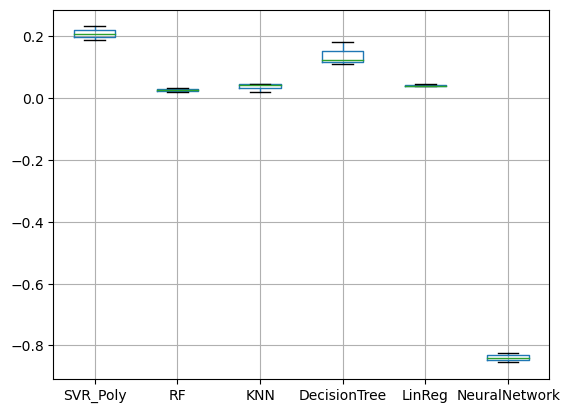

In [105]:
dataframeErreur = pd.DataFrame(arrayErreur, columns=["SVR_Poly", "RF", "KNN", "DecisionTree", "LinReg", "NeuralNetwork"])

# Distribution des erreurs de prévisions
dataframeErreur.boxplot(return_type='dict')
plt.show()


### <span style="color:blue"> **IV Modélisation avec les données manquantes**  </span>

#### <span style="color:blue"> **IV.A Imputation des données manquantes**  </span>

In [ ]:
energy3=pd.read_csv('global-data-on-sustainable-energy.csv')
energy3.head()


In [ ]:

energy3.rename(columns={energy3.columns[17]: 'Density'}, inplace=True) #renommer la colonne Density pour faciliter l'accés à la variable
energy3['Density']= pd.to_numeric(energy3['Density'], errors='coerce')


In [ ]:

energy3['Year']=energy3['Year'].astype(int)
# Définir les labels pour les catégories
bins = [2000, 2004, 2008, 2012, 2016]  
labels = ['2000-2004', '2004-2008', '2008-2012', '2012-2016']

# Transformer les années en periodes
energy3['Periode'] = pd.cut(energy3['Year'], bins=bins, labels=labels)
energy3['Periode'] = energy3['Periode'].astype('category')
energy3.drop(columns=['Year'],inplace=True)
energy3.head()

energy3['Continent']= coco.convert(names=energy3['Entity'], to='continent')

energy3.drop(['Entity'],axis=1, inplace=True)

In [ ]:
# Prendre la racine carrée des colonnes spécifiques
columns_sqrt = ["Access to electricity (% of population)",
                "Access to clean fuels for cooking",
                "Renewable energy share in the total final energy consumption (%)",
                "Electricity from nuclear (TWh)","Primary energy consumption per capita (kWh/person)",
                "Electricity from renewables (TWh)",
                "Low-carbon electricity (% electricity)"]
energy3[columns_sqrt] = np.sqrt(energy3[columns_sqrt])

# Prendre le logarithme des colonnes spécifiques
columns_log = ["gdp_per_capita",
               "Density",
               "Land Area(Km2)","Value_co2_emissions_kt_by_country",]
energy3[columns_log] = np.log(energy3[columns_log])

#Nous isolons la variable à prédire, 

#energy3.drop(["Value_co2_emissions_kt_by_country"],axis=1,inplace=True)

#Nous enlecons les variables quantitatives qui ont beaucoup de NaN
energy3.drop(["Renewable-electricity-generating-capacity-per-capita","Financial flows to developing countries (US $)","Renewables (% equivalent primary energy)"],axis=1,inplace=True)
energy3.drop(['Electricity from fossil fuels (TWh)'],axis=1,inplace=True)

In [ ]:
#On retire les variables qualitatives
energyQuant3=energy3.drop(["Periode","Continent"],axis=1)

##### <span style="color:blue"> **IV.A.1 Imputation simple**  </span>

In [ ]:
from sklearn.impute import SimpleImputer

energyQuant_mean = SimpleImputer().fit_transform(energyQuant3)


In [ ]:
energyQuant_meanImp=pd.DataFrame(energyQuant_mean, columns=energyQuant3.columns)
energyQuant_meanImp.head()

##### <span style="color:blue"> **IV.A.2 Imputation avec KNN**  </span>

In [ ]:
from sklearn.impute import  KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)L
energyQuant_kNN = knn_imputer.fit_transform(energyQuant3)

In [ ]:
energyQuant_kNNImp=pd.DataFrame(energyQuant_kNN,columns=energyQuant3.columns)
energyQuant_kNNImp.head()

##### <span style="color:blue"> **IV.A.3 Imputation avec Missforest**  </span>

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
estimator_rf = ExtraTreesRegressor(n_estimators=20, random_state=0)
energyQuant_rf = IterativeImputer(estimator=estimator_rf, random_state=0, max_iter=300,tol=4e-2).fit_transform(energyQuant3)

In [ ]:
energyQuant_rfIMp=pd.DataFrame(energyQuant_rf,columns=energyQuant3.columns)
energyQuant_rfIMp.head()

In [ ]:
def set(data,dataquant):
    Value_CO2=dataquant["Value_co2_emissions_kt_by_country"]
    dataquant2=dataquant.drop(["Value_co2_emissions_kt_by_country"],axis=1,)
    dataDum1=pd.get_dummies(data[['Periode','Continent']])
    df= pd.concat([dataDum1, dataquant2], axis=1) 
    scaler = StandardScaler()   
    XTrain, XTest, YTrain, YTest = train_test_split(df,Value_CO2 , test_size=0.2, random_state=11)
    scaler.fit(XTrain)
    Xr_train = scaler.transform(XTrain)
    
    Xr_test = scaler.transform(XTest)
    return Xr_train,Xr_test,YTrain,YTest
    

#### <span style="color:blue"> **IV.B Prédiction avec les données imputées**  </span>

#### <span style="color:blue"> **IV.B.1 Avec la méthode Simple**  </span>

In [ ]:
Xr_train,Xr_test,YTrain, YTest=set(energy3,energyQuant_meanImp)

#### <span style="color:blue"> **a. Regression Linéaire**  </span>

In [ ]:
regLin = LinearRegression()
regLin.fit(Xr_train, YTrain)

# Making predictions on the testing set
y_chap = regLin.predict(Xr_test)

# Calculating mean squared error
mse = mean_squared_error(YTest, prev)
R2=r2_score(YTest,prev)

print("MSE =", mse)
print("R2 =",R2)

In [ ]:
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap,YTest-y_chap)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap,YTest)
plt.plot(y_chap,y_chap,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

#### <span style="color:blue"> **b. Regression Linéaire avec Lasso**  </span>

In [ ]:
param=[{"alpha":[0,0.05,0.1,0.2,0.3,50,500,1000,1500]}]
regLasso = GridSearchCV(Lasso(), param,cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(Xr_train, YTrain)
# paramètre optimal
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

In [ ]:
# Making predictions on the testing set
y_chap = regLassOpt.predict(Xr_test)

# Calculating mean squared error
mse = mean_squared_error(YTest, prev)
R2=r2_score(YTest,y_chap)

print("MSE =", mse)
print("R2 =",R2)

In [ ]:
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap,YTest-y_chap)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap,YTest)
plt.plot(y_chap,y_chap,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

#### <span style="color:blue"> **c. SVM**  </span>

In [ ]:
inputY=energyQuant_meanImp["Value_co2_emissions_kt_by_country"]
inputX=energyQuant_meanImp.drop(["Value_co2_emissions_kt_by_country"],axis=1)
XTr_svm, XT_svm, YTr_svm, YT_svm = train_test_split(inputX, inputY, test_size=0.2, random_state=11)
scaler.fit(XTr_svm)
Xr_train_svm = scaler.transform(XTr_svm)

Xr_test_svm = scaler.transform(XT_svm)

In [ ]:
param = {'degree': [2, 3, 4,5,6]}  # Range of C and degree values to try
svm = GridSearchCV(SVR(epsilon=0.1, kernel='poly'), param_grid=param, cv=10, n_jobs=-1)
svmOpt = svm.fit(Xr_train_svm, YTr_svm)

# Best parameters
print("Best score = %f, Best parameters = %s" % (1. - svmOpt.best_score_, svmOpt.best_params_))

In [ ]:
y_chap=svmOpt.predict(Xr_test_svm)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap,YT_svm-y_chap)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap,YT_svm)
plt.plot(y_chap,y_chap,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

#### <span style="color:blue"> **d. Cart**  </span>

In [ ]:
# Optimisation de la profondeur de l'arbre
param=[{"max_depth":list(range(2,18))}]
tree= GridSearchCV(DecisionTreeRegressor(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(Xr_train, YTrain)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))

In [ ]:
y_chap_= treeOpt.predict(Xr_test)
mse=mean_squared_error(y_chap_,YTest)

print("MSE=",mse)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap_,YTest-y_chap_)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap_,YTest)
plt.plot(y_chap_,y_chap_,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

#### <span style="color:blue"> **e. Random Forest**  </span>

In [ ]:
param=[{"max_features":list(range(2,20,2))}]
rf= GridSearchCV(RandomForestRegressor(n_estimators=100),
        param,cv=5,n_jobs=-1)
rfOpt=rf.fit(Xr_train, YTrain)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

In [ ]:
y_chap = rfOpt.predict(Xr_test)
rf_mse=mean_squared_error(y_chap,YTest)
print("MSE=",rf_mse)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap,YTest-y_chap)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap,YTest)
plt.plot(y_chap,y_chap,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

#### <span style="color:blue"> **IV.B.2 Avec la méthode KNN**  </span>

In [ ]:
Xr_train,Xr_test,YTrain, YTest=set(energy3,energyQuant_kNNImp)

##### <span style="color:blue"> **a. Regression Linéaire**  </span>

In [ ]:
regLin = LinearRegression()
regLin.fit(Xr_train, YTrain)

# Making predictions on the testing set
y_chap = regLin.predict(Xr_test)

# Calculating mean squared error
mse = mean_squared_error(YTest, prev)
R2=r2_score(YTest,prev)

print("MSE =", mse)
print("R2 =",R2)

In [ ]:
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap,YTest-y_chap)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap,YTest)
plt.plot(y_chap,y_chap,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

##### <span style="color:blue"> **b. Regression Linéaire avec Lasso**  </span>

In [ ]:
param=[{"alpha":[0,0.05,0.1,0.2,0.3,50,500,1000,1500]}]
regLasso = GridSearchCV(Lasso(), param,cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(Xr_train, YTrain)
# paramètre optimal
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

In [ ]:
# Making predictions on the testing set
y_chap = regLassOpt.predict(Xr_test)

# Calculating mean squared error
mse = mean_squared_error(YTest, prev)
R2=r2_score(YTest,y_chap)

print("MSE =", mse)
print("R2 =",R2)

In [ ]:
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap,YTest-y_chap)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap,YTest)
plt.plot(y_chap,y_chap,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

##### <span style="color:blue"> **c. SVM**  </span>

In [ ]:
# Calculate execution time
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")inputY=energyQuant_kNNImp["Value_co2_emissions_kt_by_country"]
inputX=energyQuant_kNNImp.drop(["Value_co2_emissions_kt_by_country"],axis=1)
XTr_svm, XT_svm, YTr_svm, YT_svm = train_test_split(inputX, inputY, test_size=0.2, random_state=11)
scaler.fit(XTr_svm)
Xr_train_svm = scaler.transform(XTr_svm)

Xr_test_svm = scaler.transform(XT_svm)

In [ ]:
param = {'degree': [2, 3, 4,5,6]}  # Range of C and degree values to try
svm = GridSearchCV(SVR(epsilon=0.1, kernel='poly'), param_grid=param, cv=10, n_jobs=-1)
svmOpt = svm.fit(Xr_train_svm, YTr_svm)

# Best parameters
print("Best score = %f, Best parameters = %s" % (1. - svmOpt.best_score_, svmOpt.best_params_))

y_chap=svmOpt.predict(Xr_test_svm)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap,YT_svm-y_chap)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap,YT_svm)
plt.plot(y_chap,y_chap,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

##### <span style="color:blue"> **d. CART**  </span>

In [ ]:
param=[{"max_depth":list(range(2,18))}]
tree= GridSearchCV(DecisionTreeRegressor(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(Xr_train, YTrain)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))

In [ ]:
y_chap_= treeOpt.predict(Xr_test)
mse=mean_squared_error(y_chap_,YTest)

print("MSE=",mse)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap_,YTest-y_chap_)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap_,YTest)
plt.plot(y_chap_,y_chap_,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

##### <span style="color:blue"> **e. Random Forest**  </span>

In [ ]:
param=[{"max_features":list(range(2,20,2))}]
rf= GridSearchCV(RandomForestRegressor(n_estimators=100),
        param,cv=5,n_jobs=-1)
rfOpt=rf.fit(Xr_train, YTrain)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

In [ ]:
y_chap = rfOpt.predict(Xr_test)
rf_mse=mean_squared_error(y_chap,YTest)
print("MSE=",rf_mse)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap,YTest-y_chap)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap,YTest)
plt.plot(y_chap,y_chap,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

#### <span style="color:blue"> **IV.B.3 Avec la méthode MissForest**  </span>

In [ ]:
Xr_train,Xr_test,YTrain, YTest=set(energy3,energyQuant_rfIMp)

##### <span style="color:blue"> **a. Regression Linéaire**  </span>

In [ ]:
regLin = LinearRegression()
regLin.fit(Xr_train, YTrain)

# Making predictions on the testing set
y_chap = regLin.predict(Xr_test)

# Calculating mean squared error
mse = mean_squared_error(YTest, prev)
R2=r2_score(YTest,prev)

print("MSE =", mse)
print("R2 =",R2)

In [ ]:
y_chap = regLin.predict(Xr_test)
mse=mean_squared_error(y_chap,YTest)
print("MSE=",rf_mse)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap,YTest-y_chap)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap,YTest)
plt.plot(y_chap,y_chap,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

##### <span style="color:blue"> **a. Regression Linéaire avec Lasso**  </span>

In [ ]:
param=[{"alpha":[0,0.05,0.1,0.2,0.3,50,500,1000,1500]}]
regLasso = GridSearchCV(Lasso(), param,cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(Xr_train, YTrain)
# paramètre optimal
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

In [ ]:
# Making predictions on the testing set
y_chap = regLassOpt.predict(Xr_test)

# Calculating mean squared error
mse = mean_squared_error(YTest, prev)
R2=r2_score(YTest,y_chap)

print("MSE =", mse)
print("R2 =",R2)

In [ ]:
y_chap = regLassOpt.predict(Xr_test)
mse=mean_squared_error(y_chap,YTest)
print("MSE=",rf_mse)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap,YTest-y_chap)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap,YTest)
plt.plot(y_chap,y_chap,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

##### <span style="color:blue"> **c. SVM**  </span>

In [ ]:
inputY=energyQuant_rfIMp["Value_co2_emissions_kt_by_country"]
inputX=energyQuant_rfIMp.drop(["Value_co2_emissions_kt_by_country"],axis=1)
XTr_svm, XT_svm, YTr_svm, YT_svm = train_test_split(inputX, inputY, test_size=0.2, random_state=11)
scaler.fit(XTr_svm)
Xr_train_svm = scaler.transform(XTr_svm)

Xr_test_svm = scaler.transform(XT_svm)

In [ ]:
param = {'degree': [2, 3, 4,5,6]}  # Range of C and degree values to try
svm = GridSearchCV(SVR(epsilon=0.1, kernel='poly'), param_grid=param, cv=10, n_jobs=-1)
svmOpt = svm.fit(Xr_train_svm, YTr_svm)

# Best parameters
print("Best score = %f, Best parameters = %s" % (1. - svmOpt.best_score_, svmOpt.best_params_))

In [ ]:
y_chap=svmOpt.predict(Xr_test_svm)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap,YT_svm-y_chap)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap,YT_svm)
plt.plot(y_chap,y_chap,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

##### <span style="color:blue"> **d. CART**  </span>

In [ ]:
param=[{"max_depth":list(range(2,18))}]
tree= GridSearchCV(DecisionTreeRegressor(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(Xr_train, YTrain)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))

In [ ]:
y_chap_= treeOpt.predict(Xr_test)
mse=mean_squared_error(y_chap_,YTest)

print("MSE=",mse)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap_,YTest-y_chap_)
plt.xlabel('Fitted values')
plt.ylabel('residuals')

plt.subplot(1,2,2)
plt.scatter(y_chap_,YTest)
plt.plot(y_chap_,y_chap_,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

##### <span style="color:blue"> **e. Random Forest**  </span>

In [32]:
param=[{"max_features":list(range(2,20,2))}]
rf= GridSearchCV(RandomForestRegressor(n_estimators=100),
        param,cv=5,n_jobs=-1)
rfOpt=rf.fit(Xr_train, YTrain)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

NameError: name 'GridSearchCV' is not defined

In [33]:
y_chap = rfOpt.predict(Xr_test)
rf_mse=mean_squared_error(y_chap,YTest)
print("MSE=",rf_mse)
plt.subplots_adjust(wspace=1.5)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_chap,YTest-y_chap)
plt.xlabel('Fitted values')
plt.ylabel('residuals')


plt.subplot(1,2,2)
plt.scatter(y_chap,YTest)
plt.plot(y_chap,y_chap,'r')
plt.xlabel('Fitted values')
plt.ylabel('values')
plt.show()

NameError: name 'rfOpt' is not defined